##### Bu proje, telekom endüstrisinde müşterilerin şirketten ayrılıp ayrılmayacağını tahmin etmek için makine öğrenimi sınıflandırma algoritmaları  kullanılmıştır.
##### Müşteri kaybını etkileyen önemli faktörleri belirlemek ve elde edilen bulgulara dayanarak, müşteri kaybını azaltmak ve müşteri sadakatini artırmak için stratejiler geliştirmek önemlidir.
##### Müşterilerle düzenli olarak anket yaparak memnuniyet düzeylerini ölçmek ve ayrılma eğilimlerini tespit etmek veya birebir görüşmeler yaparak sorunlarını ve beklentilerini anlamaya çalışarak yakın ilişkiler kurabiliriz. Fakat makine öğrenmesi yöntemleri, müşteri kaybını daha hassas ve otomatik bir şekilde tahmin etmeyi sağlayarak proaktif önlemler alınmasına yardımcı olur.
##### Müşteri kaybı tahminleri, pazarlama ekiplerine hedefli kampanyalar ve müşteri sadakatini artırma stratejileri geliştirirken, satış ekipleri proaktif satış stratejileri oluşturabilir. Üst düzey yöneticiler ise bu tahminleri stratejik kararlar ve bütçe optimizasyonu için kullanabilir.


# Veri Seti

### Sınıflandırma Etiketi 
##### Churn — Müşterinin vazgeçip vazgeçmediği (Yes veya No) 

### Her Müşterinin Kaydolması Gereken Hizmetler 
##### PhoneService — Müşterinin telefon hizmetinin olup olmadığı (Yes or No)
##### MultipleLines — Müşterinin birden fazla hattının olup olmadığı (Yes, No, No phone service)
##### InternetService — Müşterinin sahip olduğu bir tür internet hizmeti (DSL, Fiber Optic, No)
##### OnlineSecurity — Müşterinin çevrimiçi güvenliğinin olup olmadığı (Yes, No, No Internet Service)
##### OnlineBackup — Müşterinin çevrimiçi yedeğinin olup olmadığı (Yes, No, No Internet Service)
##### DeviceProtection — Müşterinin cihaz korumasına sahip olup olmadığı (Yes, No, No Internet Service)
##### TechSupport — Müşterinin teknik desteğe sahip olup olmadığı  (Yes, No, No Internet Service)
##### StreamingTV—Müşterinin yayın yapan bir TV'si olup olmadığı (Yes, No, No Internet Service)
##### StreamingMovies — Müşterinin film akışı olup olmadığı (Yes, No, No Internet Service)

### Müşteri Hesap Bilgileri 
##### Tenure — Ne kadar süre müşteri şirkette kaldı 
##### Contract — Müşterinin sahip olduğu sözleşme türü (Month-to-Month, One year, Two years) 
##### PaperlessBilling — Müşterinin kağıtsız faturalandırması olup olmadığı (Yes, No)
##### PaymentMethod — müşteri tarafından kullanılan ödeme yöntemi (Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic)) 
##### MonthlyCharges — Müşteriden aylık olarak tahsil edilen tutar 
##### TotalCharges — Müşteriden tahsil edilen toplam tutar 

### Müşteri Demografik Bilgileri
##### customerID — Her müşteri için benzersiz değer 
##### Gender — Her müşterinin cinsiyet türü (Female, Male)
##### SeniorCitizen — Müşterinin yaşlı olup olmadığı (Yes, No)
##### Partner — Müşterinin ortağı olup olmadığı (Yes, No)
##### Dependents — Müşterinin bağımlısı olup olmadığı (Yes, No)

# Cevabını vermek istediğimiz ilk soru "Hiçbir işlem yapılmasaydı modelimiz nasıl bir sonuç verecekti?" sorusu olacaktır.
# Basit Modelimizi oluşturuyoruz!

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', 999)

import seaborn as sns
import matplotlib.pyplot as plt


import missingno as msno
import numpy as np

from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting  # HistGradientBoostingClassifier için gerekli
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
def load(path):
    df = pd.read_csv(path)
    return df

df = load("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors= "coerce")
df.dropna(axis=0, inplace=True)

In [4]:
ohe_colums = [sütun for sütun in df.columns if 10 >= df[sütun].nunique() > 2]

def one_hot_encoder(df, categorical_column, drop_first=True):
    df = pd.get_dummies(df, columns=[categorical_column], drop_first=drop_first)
    return df

for sütun in ohe_colums:
    df = one_hot_encoder(df, sütun)

In [5]:
from sklearn.preprocessing import LabelEncoder

binary_columns = [sütun for sütun in df.columns if df[sütun].dtype == object and df[sütun].nunique() == 2]

def label_encoder(df, sütun):
    labelencoder = LabelEncoder()
    df[sütun] = labelencoder.fit_transform(df[sütun])
    
    classes = labelencoder.classes_
    mapping = {cls: idx for idx, cls in enumerate(classes)}
    print(f"Sütun: {sütun}")
    print("Etiket Değerleri ve Sınıf Karşılıkları:")
    for cls, idx in mapping.items():
        print(f"{cls} -> {idx}")
    print()
    
    return df

for sütun in binary_columns:
    df = label_encoder(df, sütun)

Sütun: gender
Etiket Değerleri ve Sınıf Karşılıkları:
Female -> 0
Male -> 1

Sütun: Partner
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: Dependents
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: PhoneService
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: PaperlessBilling
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: Churn
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1



Model: KNN
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



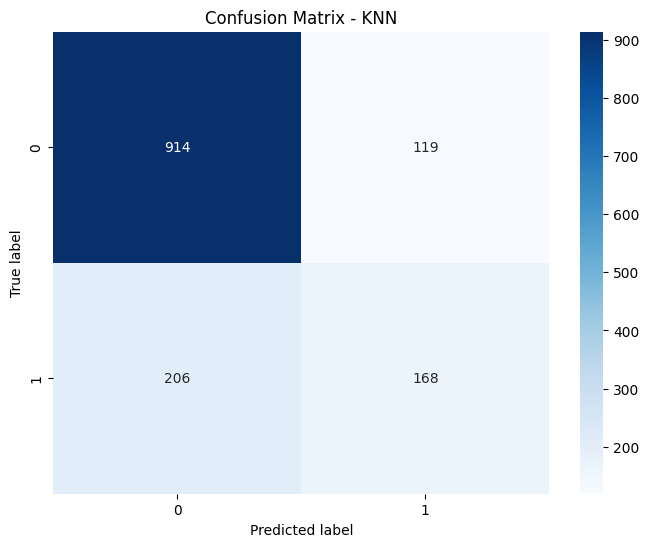

------------------------------------------------------------
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



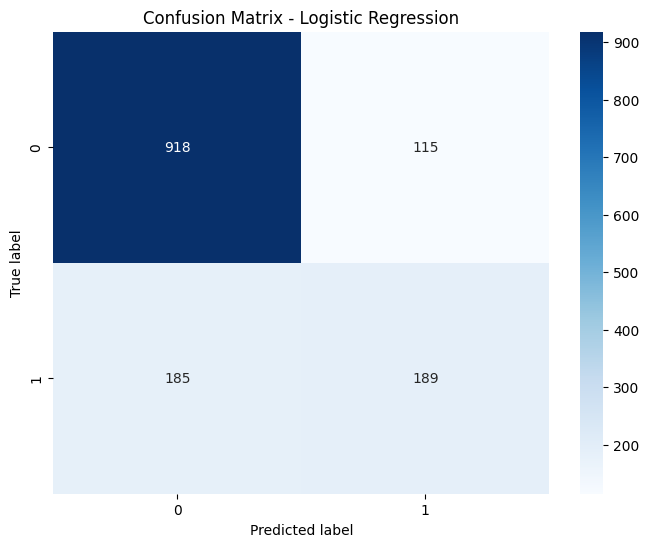

------------------------------------------------------------
Model: Logistic Regression (ElasticNet)
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.55      0.48      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



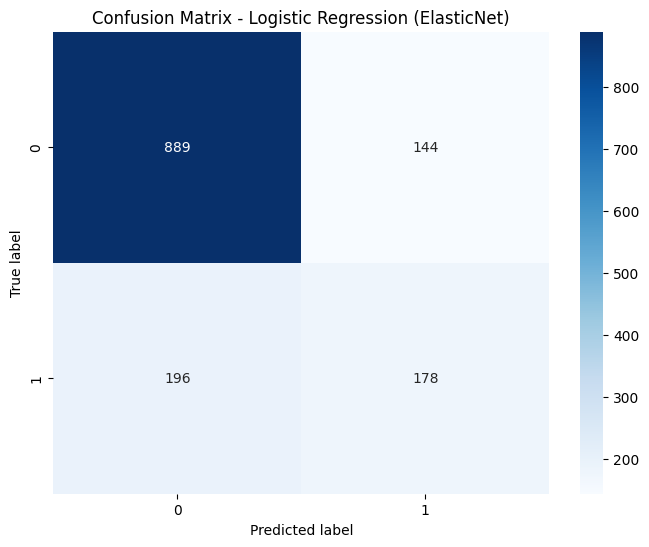

------------------------------------------------------------
Model: Ridge Classifier
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



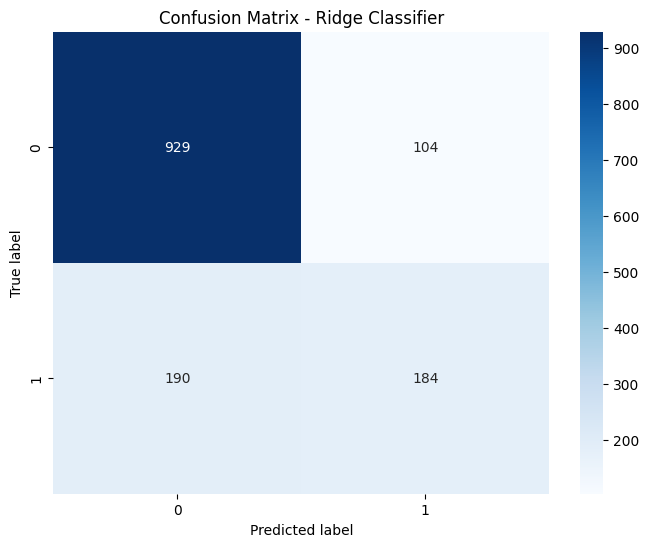

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



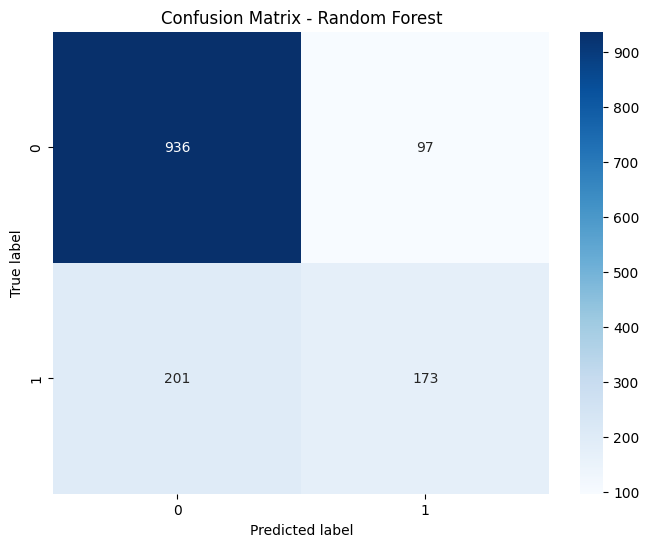

------------------------------------------------------------
Model: CART
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



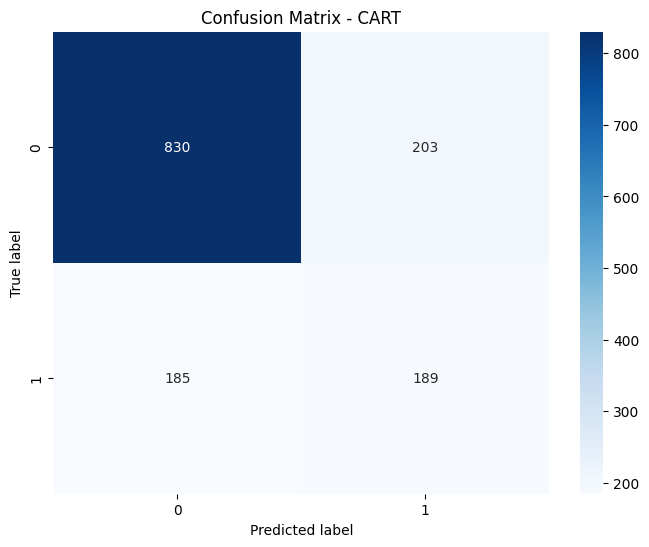

------------------------------------------------------------
Model: GBM
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



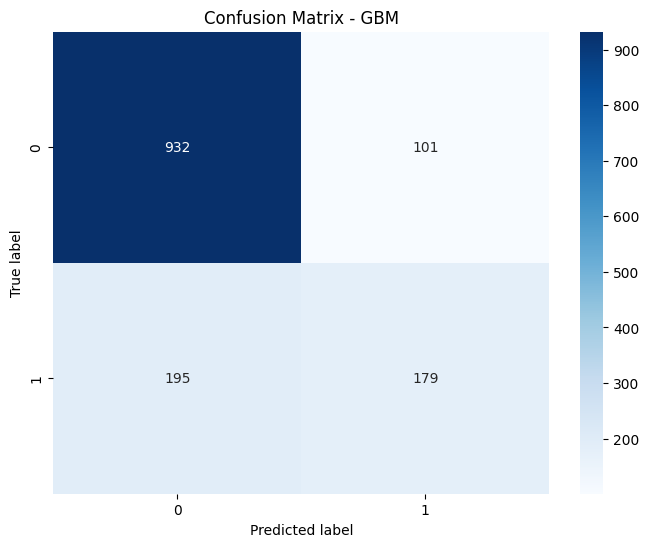

------------------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



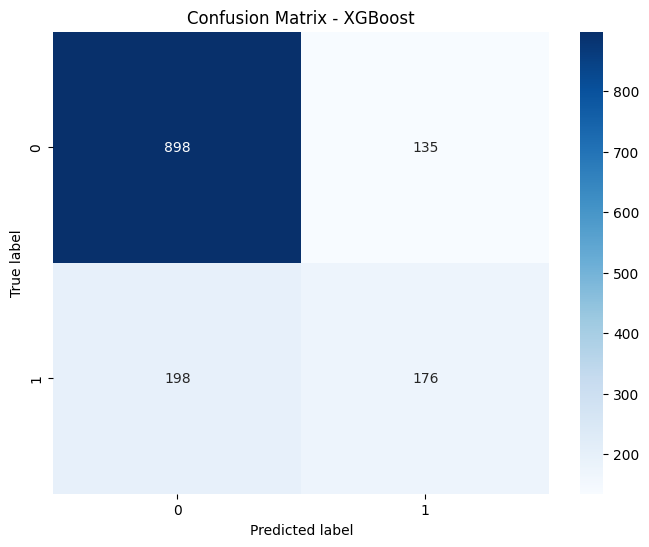

------------------------------------------------------------
Model: Adaboost
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



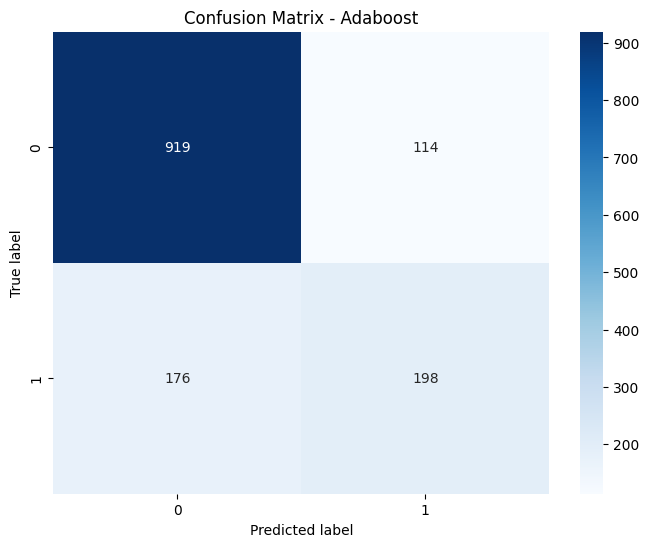

------------------------------------------------------------
Model: CatBoost
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



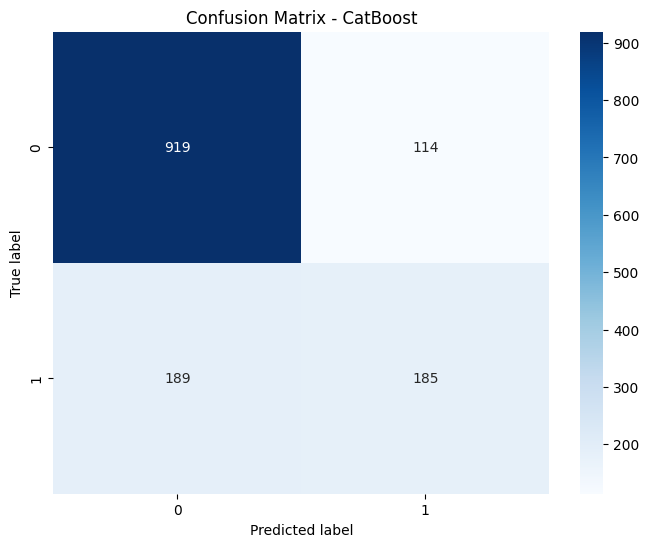

------------------------------------------------------------
Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1033
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1407
   macro avg       0.68      0.72      0.64      1407
weighted avg       0.79      0.66      0.68      1407



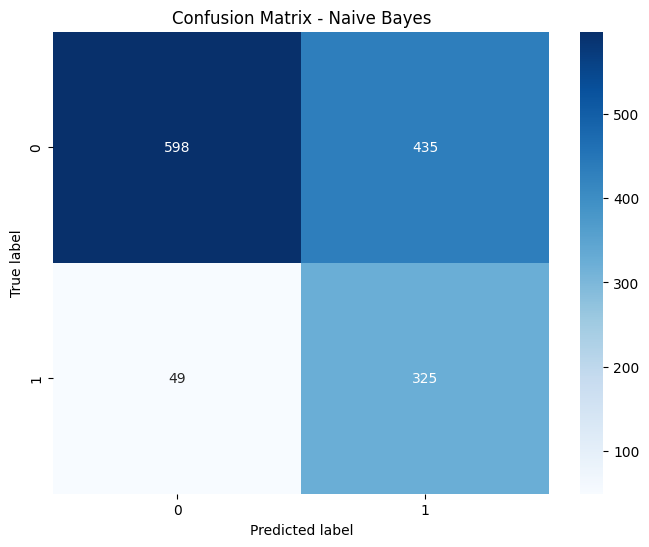

------------------------------------------------------------
Model: Naive Bayes (Multinomial)
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1033
           1       0.46      0.75      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.77      0.70      0.71      1407



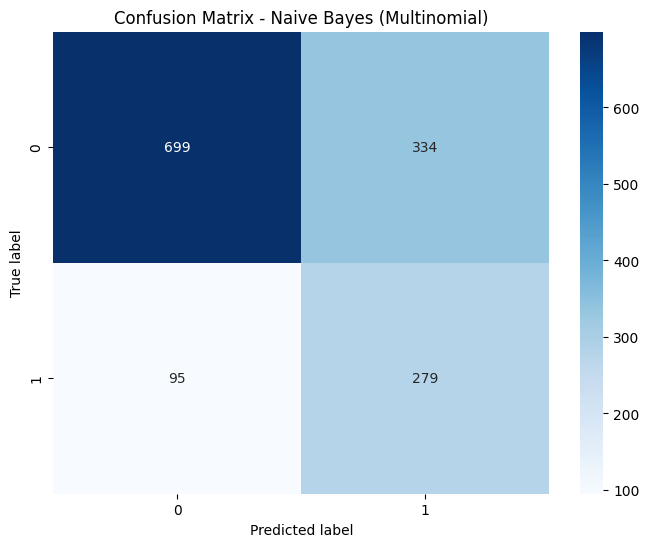

------------------------------------------------------------
Model: Naive Bayes (Complement)
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1033
           1       0.45      0.75      0.56       374

    accuracy                           0.69      1407
   macro avg       0.66      0.71      0.66      1407
weighted avg       0.76      0.69      0.70      1407



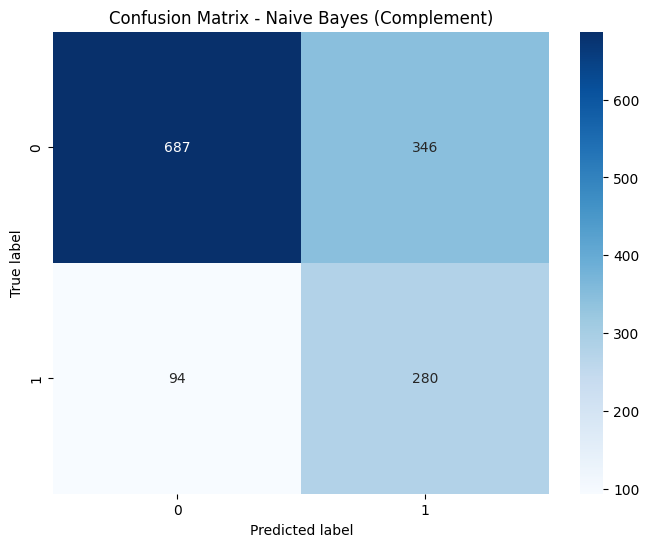

------------------------------------------------------------
Model: LDA
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



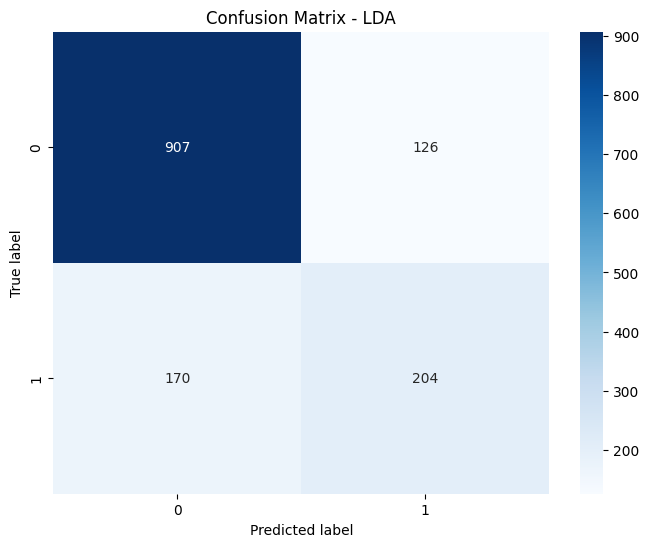

------------------------------------------------------------
Model: QDA
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1033
           1       0.45      0.80      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.72      0.67      1407
weighted avg       0.78      0.69      0.71      1407



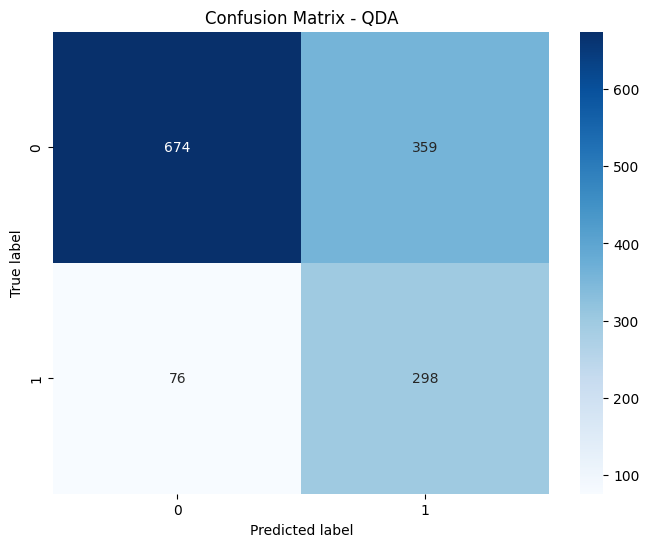

------------------------------------------------------------
Model: Extra Trees
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.47      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



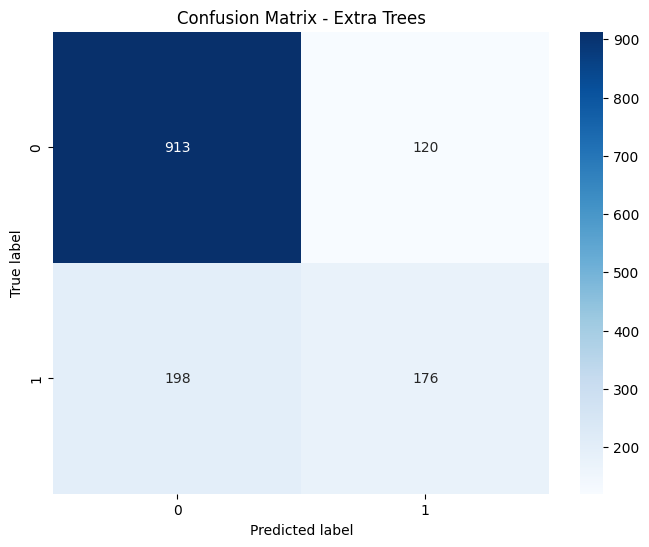

------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
Model: LightGBM
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg     

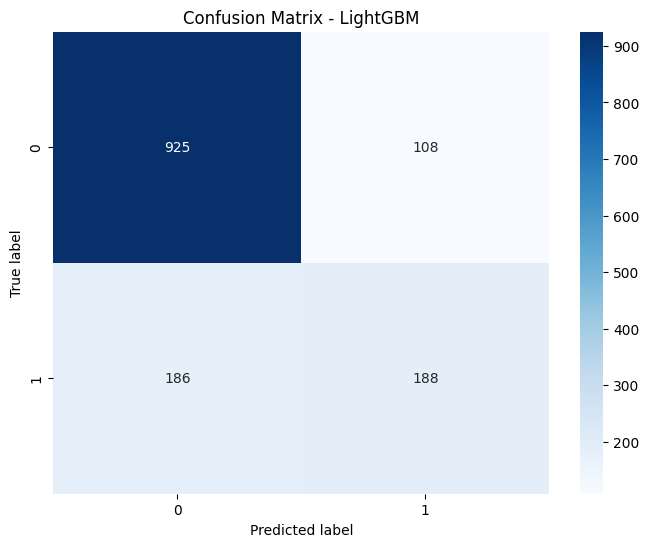

------------------------------------------------------------
Model: Hist Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



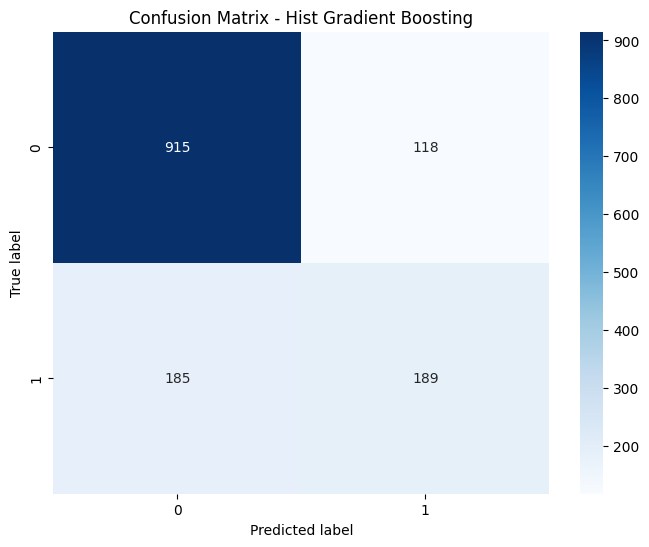

------------------------------------------------------------
Model: Nearest Centroid
              precision    recall  f1-score   support

           0       0.82      0.45      0.58      1033
           1       0.32      0.73      0.45       374

    accuracy                           0.52      1407
   macro avg       0.57      0.59      0.51      1407
weighted avg       0.69      0.52      0.55      1407



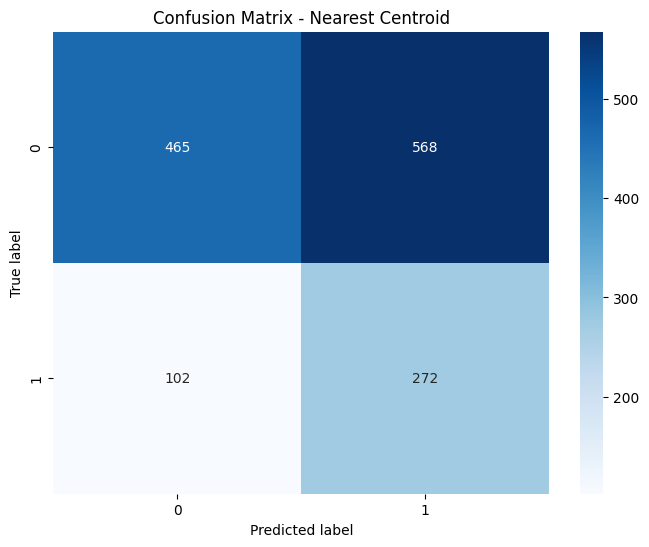

------------------------------------------------------------
Model: Neural Network (MLP)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



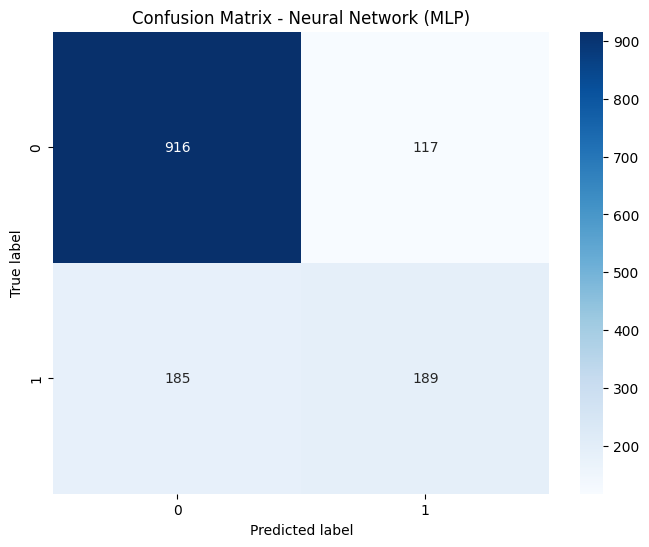

------------------------------------------------------------
Model: Stochastic Gradient Descent
              precision    recall  f1-score   support

           0       0.91      0.51      0.66      1033
           1       0.39      0.86      0.54       374

    accuracy                           0.61      1407
   macro avg       0.65      0.69      0.60      1407
weighted avg       0.77      0.61      0.62      1407



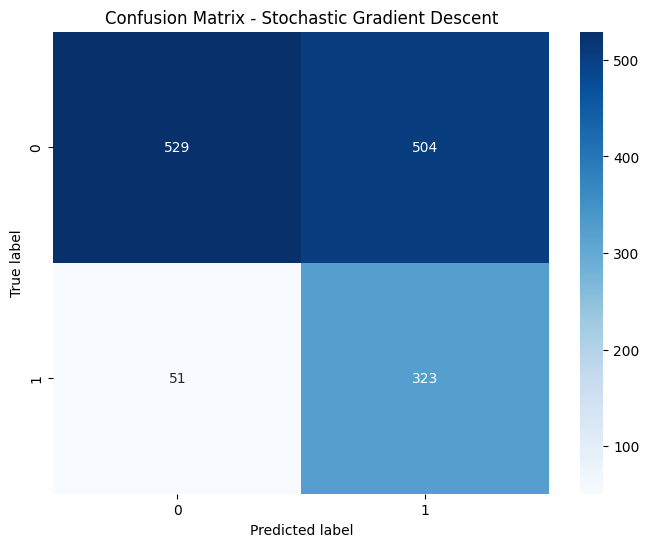

------------------------------------------------------------


In [6]:
X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Logistic Regression (ElasticNet)": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "CART": DecisionTreeClassifier(random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Complement)": ComplementNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "Nearest Centroid": NearestCentroid(),
    "Neural Network (MLP)": MLPClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
}

for name, model in classifiers.items():
    try:
        clf = model.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    except Exception as e:
        print(f"Model: {name} - Hata: {e}")
    print('-' * 60)



##### Basit Model oluşturuldu...

In [7]:
def load(path):
    df = pd.read_csv(path)
    return df

df = load("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [8]:
for column in df.columns:
    print("###########################################################################################################################")
    print(f"Sütun: {column}")
    print(f"Unique değerler: {df[column].unique()}")
    print(f"Unique değer sayısı: {len(df[column].unique())}")

###########################################################################################################################
Sütun: customerID
Unique değerler: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique değer sayısı: 7043
###########################################################################################################################
Sütun: gender
Unique değerler: ['Female' 'Male']
Unique değer sayısı: 2
###########################################################################################################################
Sütun: SeniorCitizen
Unique değerler: [0 1]
Unique değer sayısı: 2
###########################################################################################################################
Sütun: Partner
Unique değerler: ['Yes' 'No']
Unique değer sayısı: 2
###########################################################################################################################
Sütun: Dependents
Unique de

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors= "coerce")
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


In [13]:
def grab_column_name(df):

    numeric_columns = [feature for feature in df.columns if df[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16','uint32', 'uint64','float_', 'float16', 'float32','float64']]

    numeric_but_categoric_columns = [feature for feature in df.columns if df[feature].nunique() < 10 and df[feature].dtypes in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16','uint32', 'uint64','float_', 'float16', 'float32','float64']]

    categoric_columns = [feature for feature in df.columns if str(df[feature].dtypes) in ["category", "object", "bool"]]

    categoric_but_cardinal_columns = [feature for feature in df.columns if df[feature].nunique() > 20 and str(df[feature].dtypes) in ["category", "object"]]


    categoric_columns = categoric_columns + numeric_but_categoric_columns
    categoric_columns = [feature for feature in categoric_columns if feature not in categoric_but_cardinal_columns]

    numeric_columns = [feature for feature in df.columns if df[feature].dtypes in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16','uint32', 'uint64','float_', 'float16', 'float32','float64']]
    numeric_columns = [feature for feature in numeric_columns if feature not in categoric_columns]


    print('\nNumeric Columns=>',numeric_columns)
    print('\nCategoric Columns=>',categoric_columns)
    print('\nNumeric but Categoric Columns=>',numeric_but_categoric_columns)
    print('\nCategoric but Cardinal Columns=>',categoric_but_cardinal_columns)

    return numeric_columns, categoric_columns, numeric_but_categoric_columns, categoric_but_cardinal_columns

numeric_columns, categoric_columns, numeric_but_categoric_columns, categoric_but_cardinal_columns = grab_column_name(df)


Numeric Columns=> ['tenure', 'MonthlyCharges', 'TotalCharges']

Categoric Columns=> ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numeric but Categoric Columns=> []

Categoric but Cardinal Columns=> ['customerID']


        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


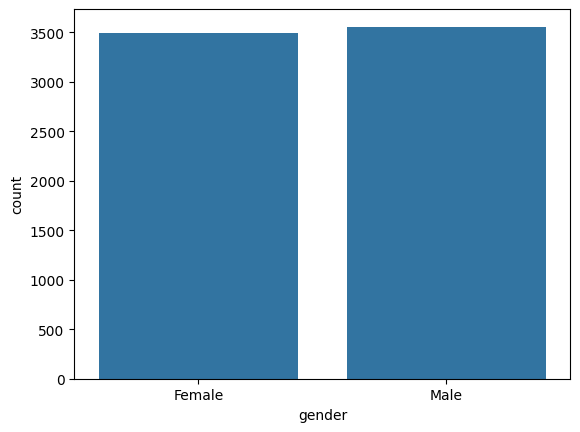

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


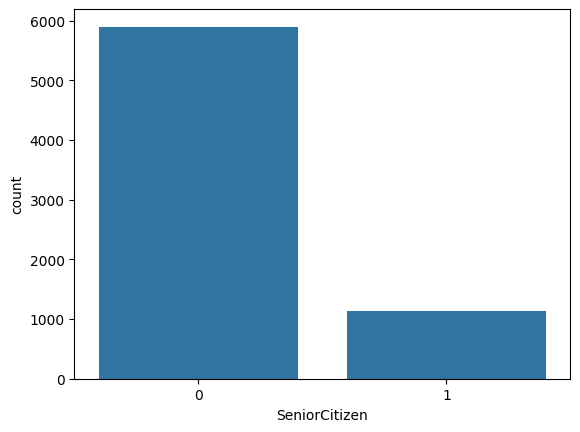

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################


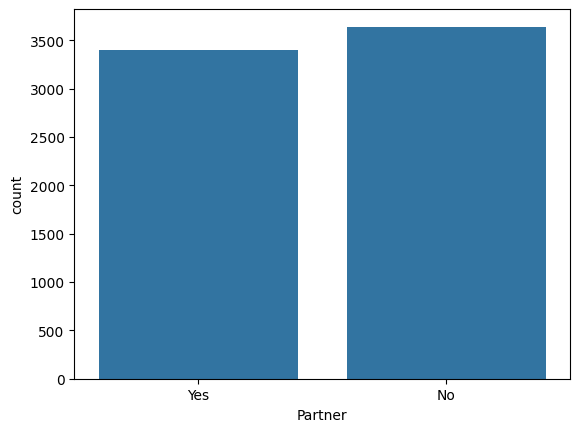

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################


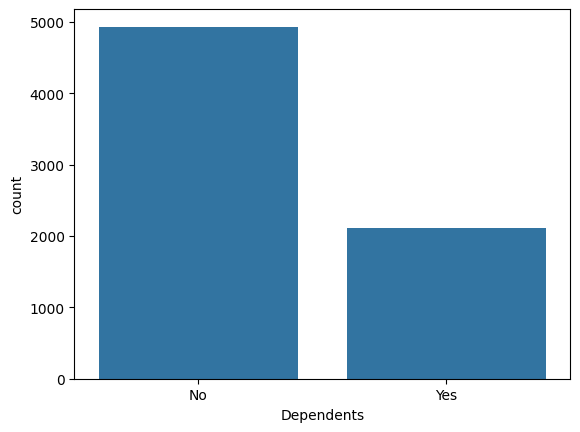

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################


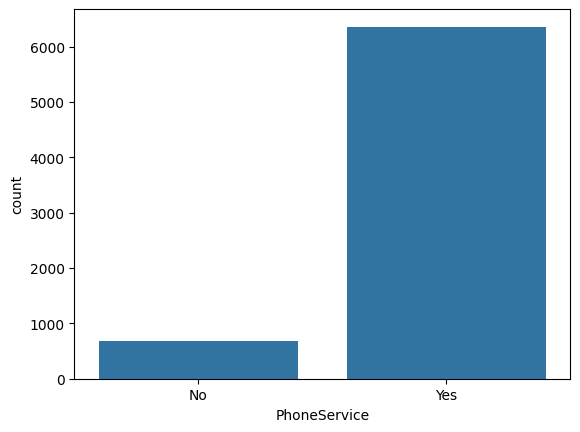

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


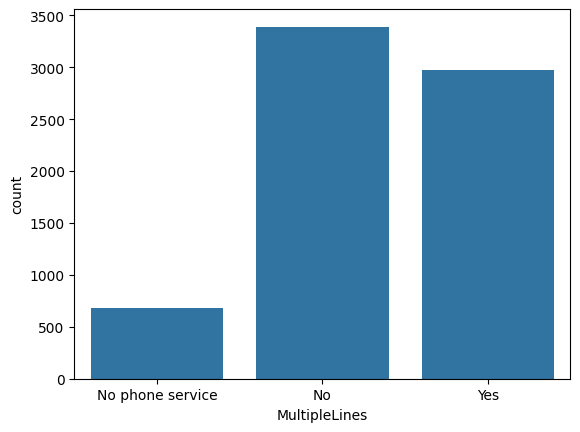

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########################################


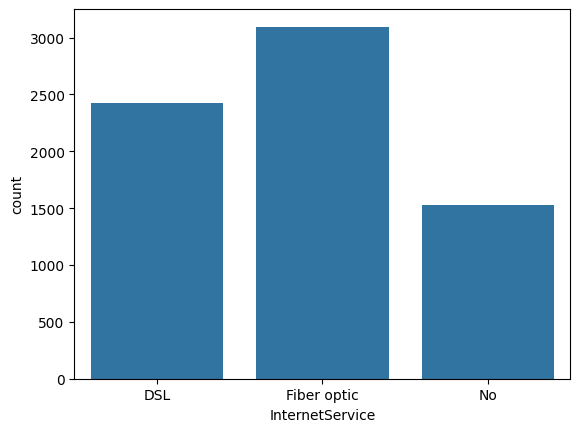

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


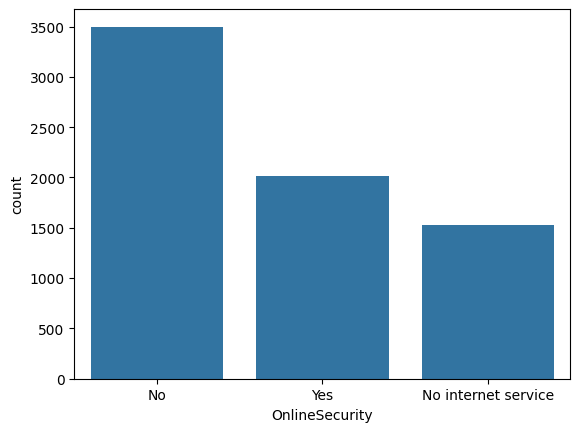

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


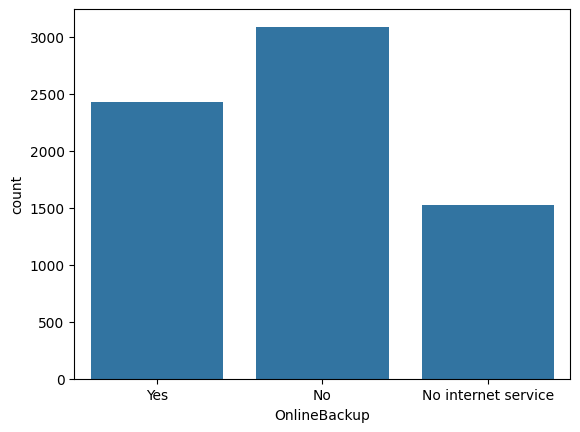

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


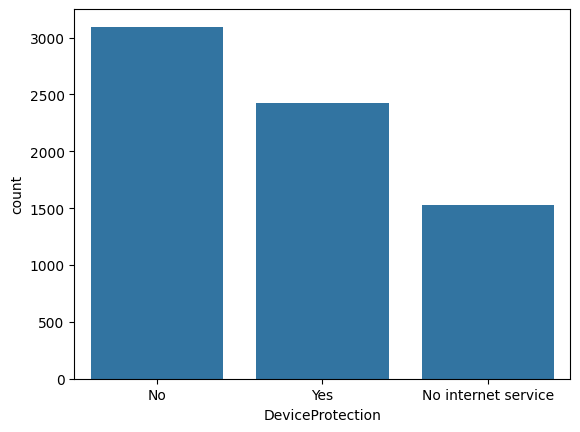

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


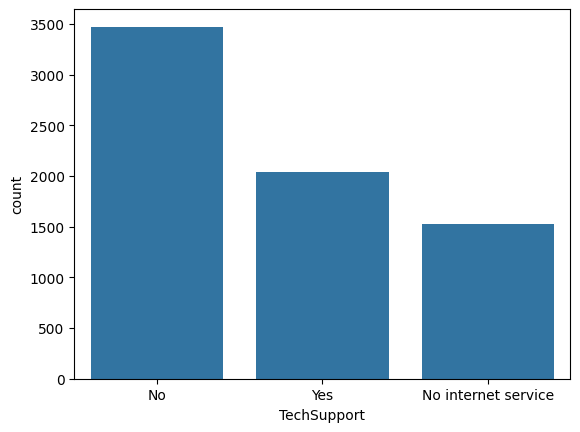

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


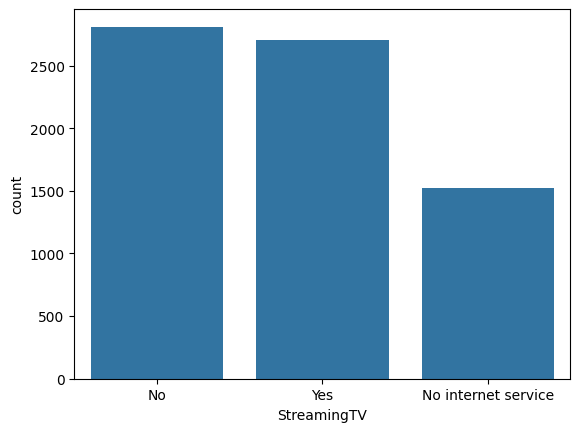

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


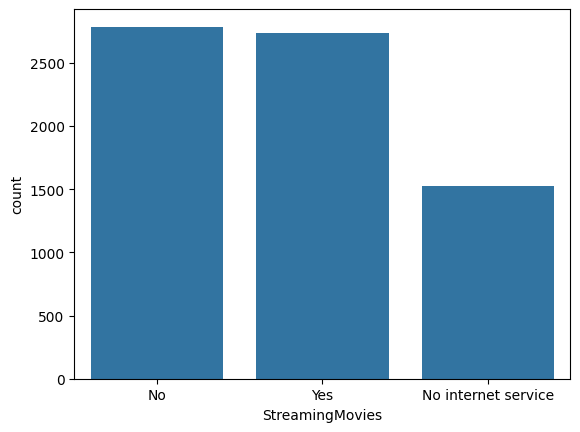

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


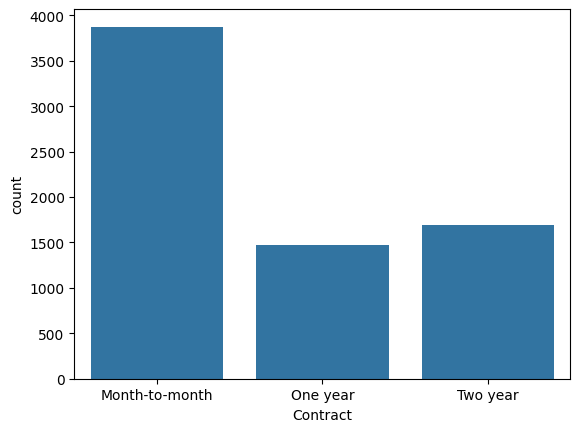

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
##########################################


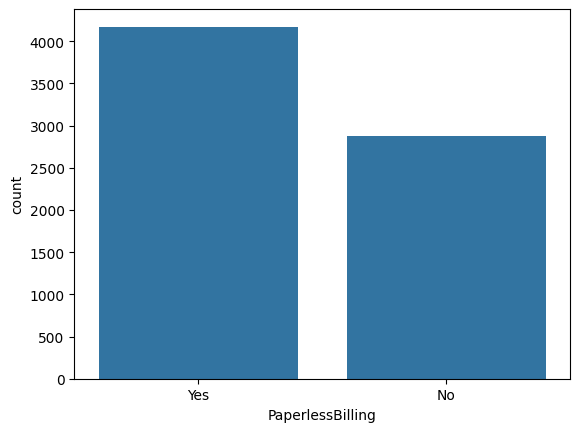

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


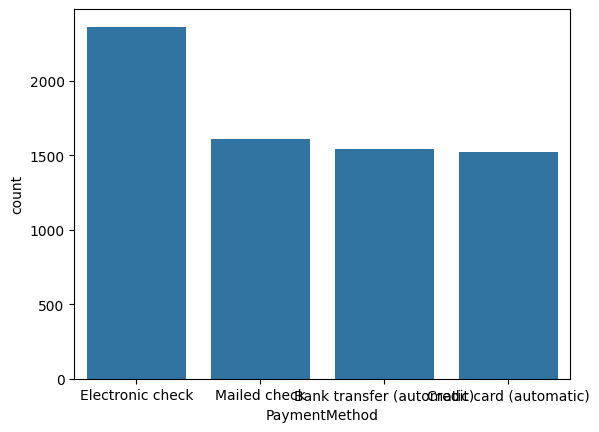

       Churn  Ratio
Churn              
No      5174 73.463
Yes     1869 26.537
##########################################


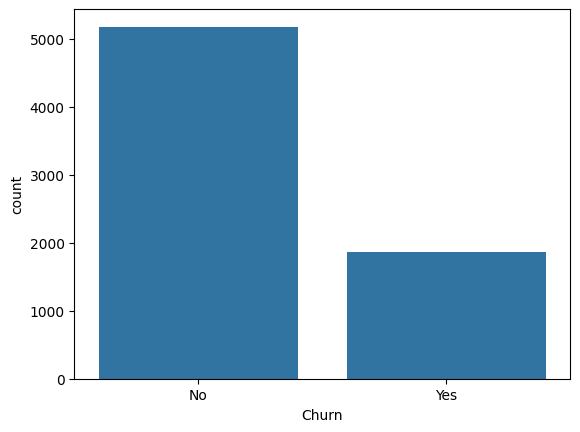

In [14]:
def categoric_columns_summary(df, sütun, plot=False):

    if df[sütun].dtypes == "bool":
        df[sütun] = df[sütun].astype(int)

        print(pd.DataFrame({sütun: df[sütun].value_counts(),
                            "Ratio": 100 * df[sütun].value_counts() / len(df)}))
        print("##########################################")

        if plot:
            sns.countplot(x=df[sütun], data=df)
            plt.show(block=True)
    else:
        print(pd.DataFrame({sütun: df[sütun].value_counts(),
                            "Ratio": 100 * df[sütun].value_counts() / len(df)}))
        print("##########################################")

        if plot:
            sns.countplot(x=df[sütun], data=df)
            plt.show(block=True)

for sütun in categoric_columns:
    categoric_columns_summary(df, sütun, plot=True)

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


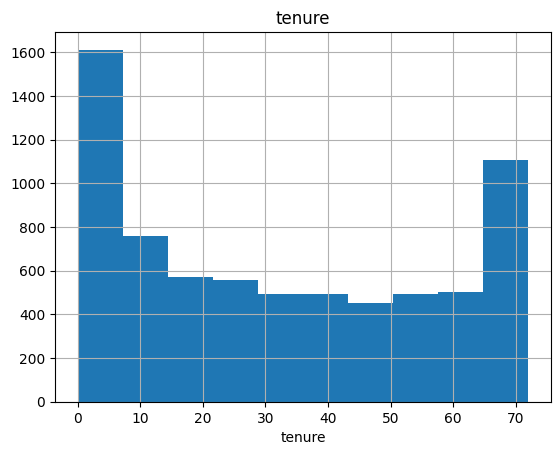

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


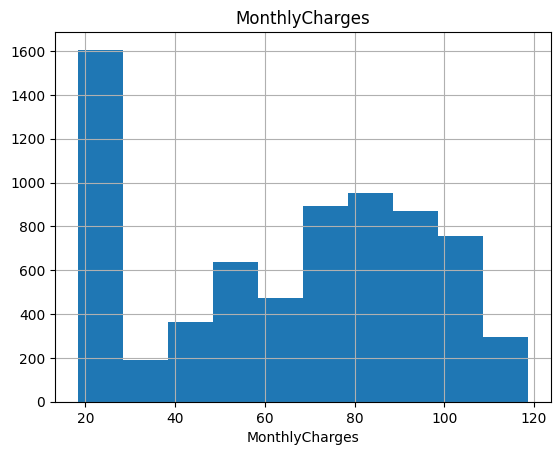

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


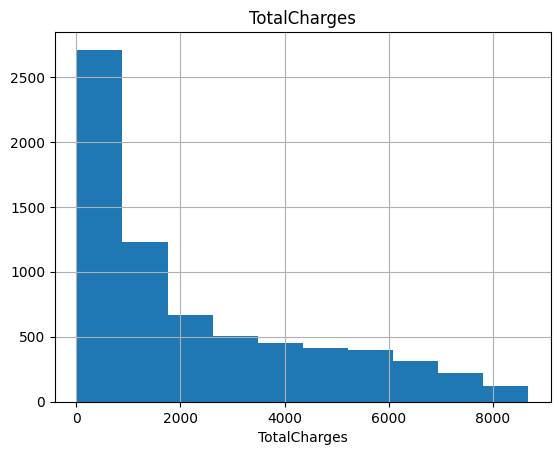

In [15]:
def numeric_columns_summary(df, sütun, plot=False):
        
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[sütun].describe(quantiles).T)

    if plot:
        df[sütun].hist()
        plt.xlabel(sütun)
        plt.title(sütun)
        plt.show(block=True)

for sütun in numeric_columns:
    numeric_columns_summary(df, sütun, plot=True)

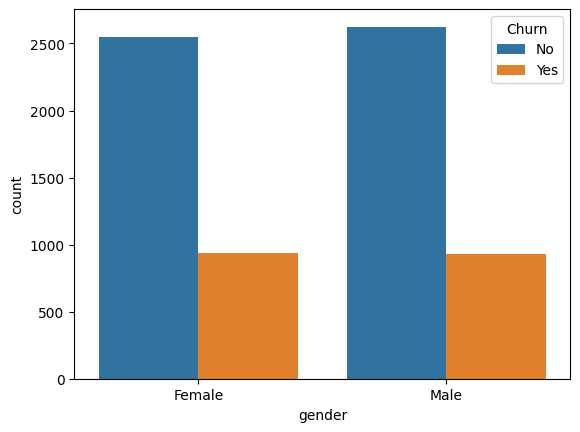

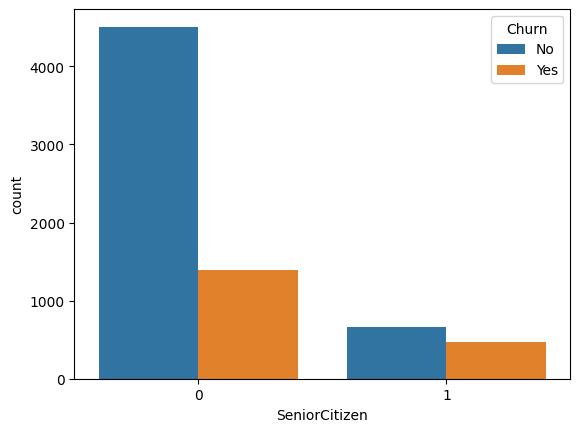

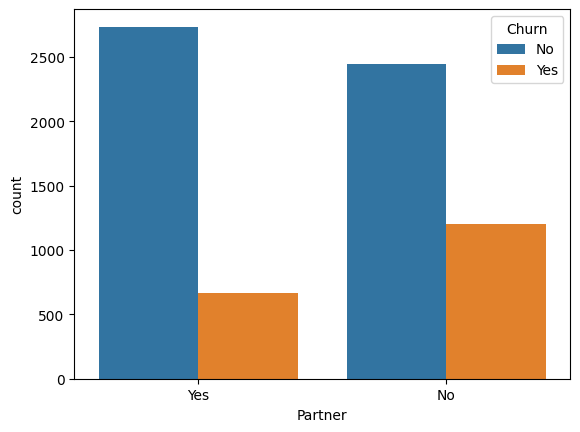

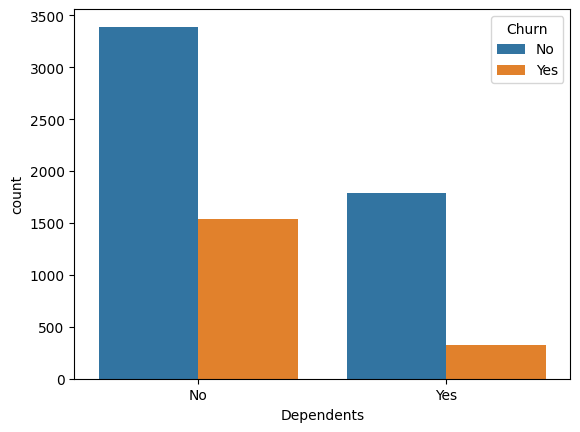

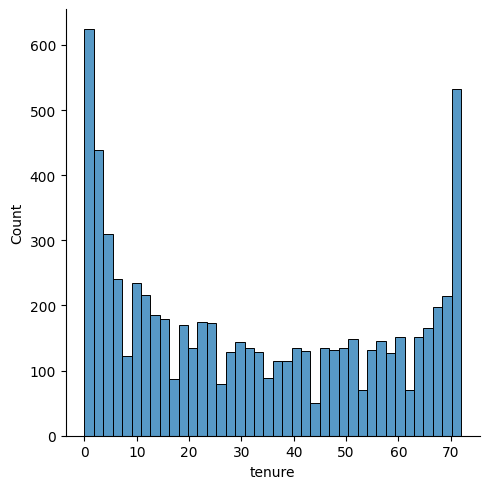

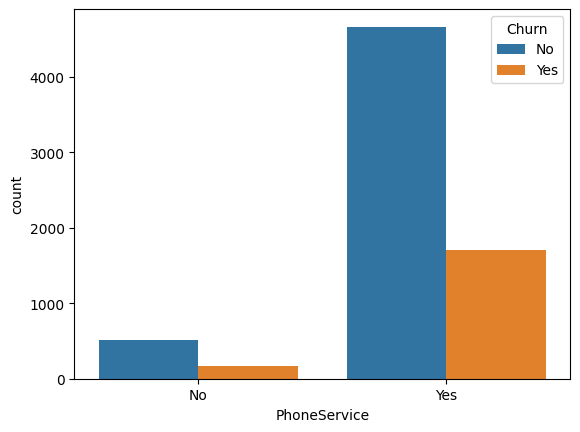

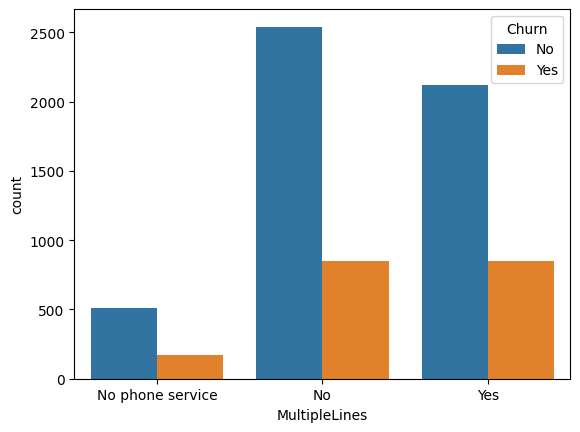

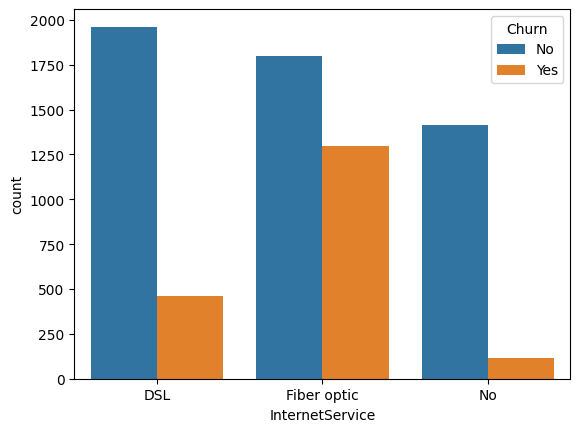

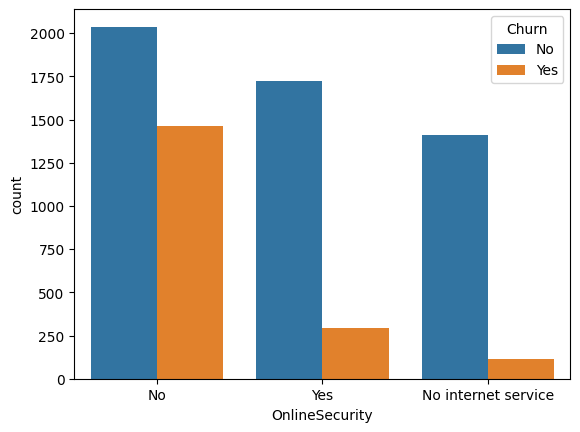

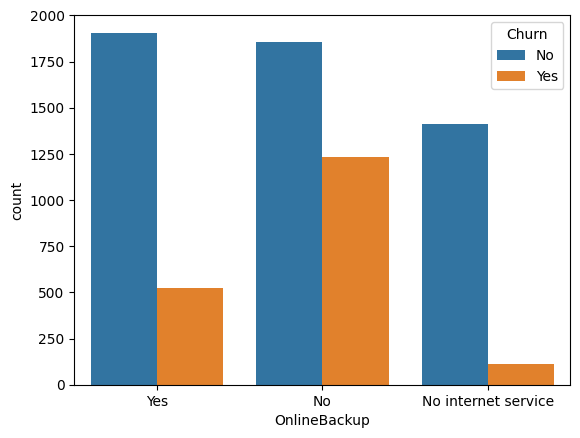

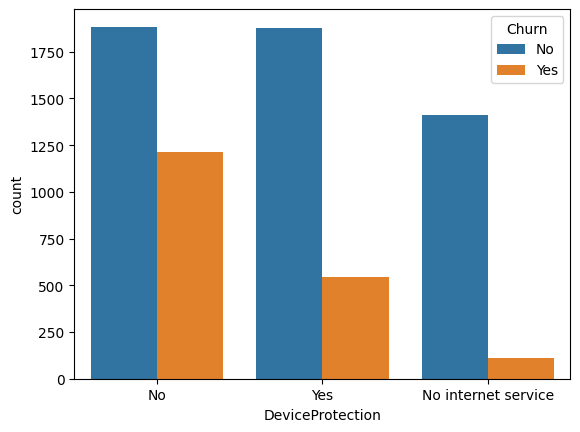

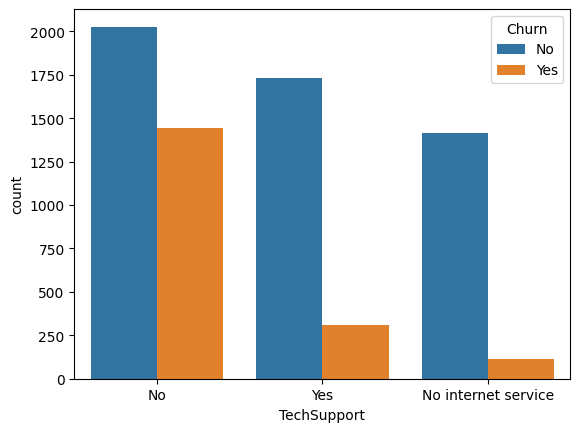

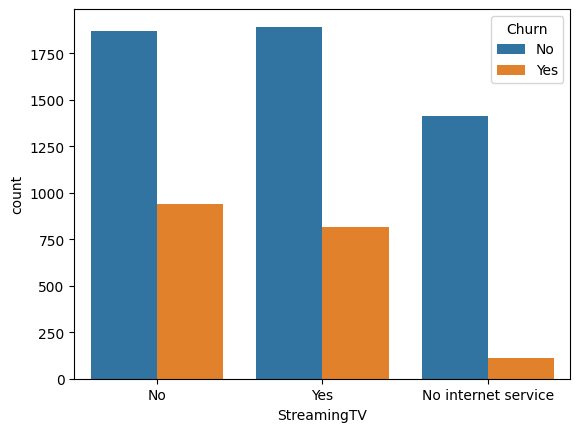

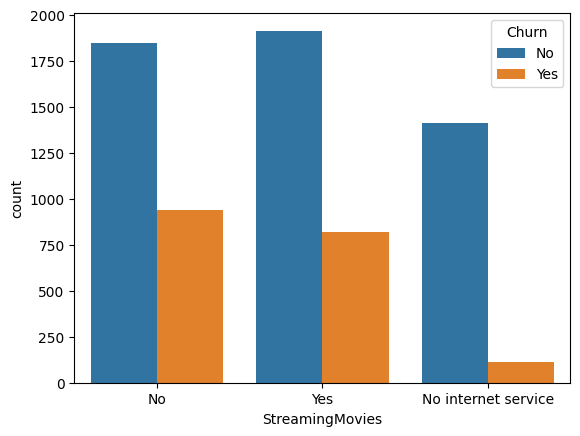

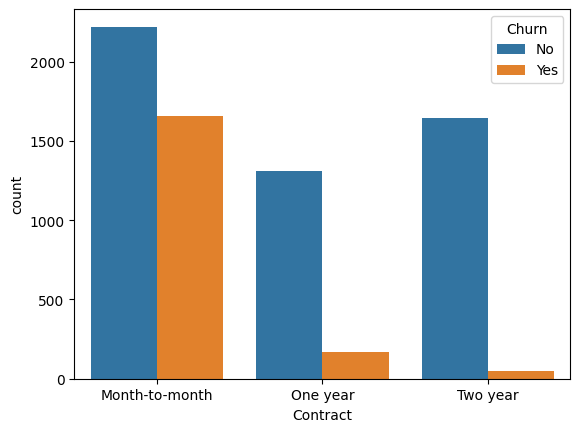

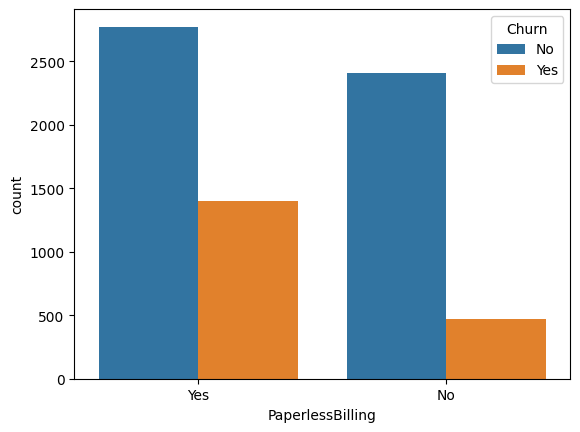

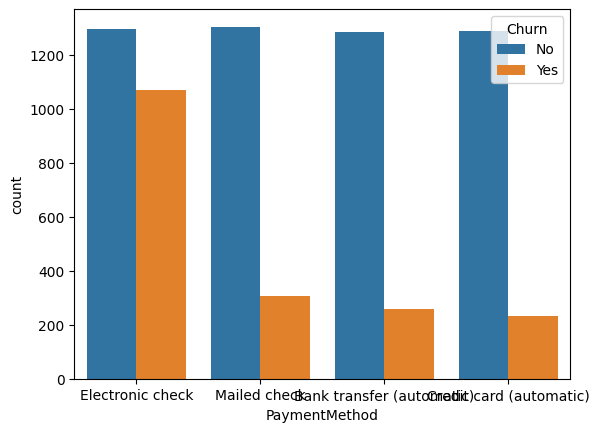

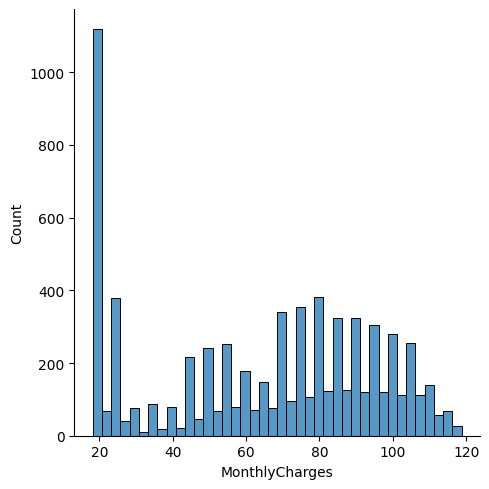

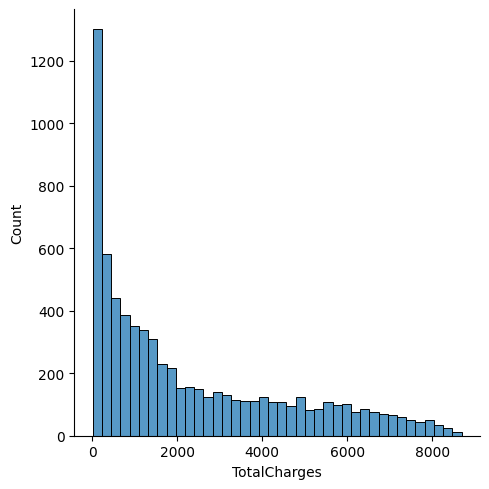

In [16]:
def target_summary_with_columns(df,target_column):
    
    for sütun in df.columns:
        if sütun == target_column:
            pass
        elif df[sütun].dtype=='O':
            sns.countplot(data=df,x=sütun,hue=target_column)
        elif df[sütun].dtype in ['int_', 'iznt8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64','float_', 'float16', 'float32','float64']:
            sns.displot(df[sütun].dropna(), bins=40)
        plt.show()

target_summary_with_columns(df.drop(categoric_but_cardinal_columns,axis=1),'Churn')

Axes(0.125,0.11;0.698618x0.77)
              n_miss  ratio
TotalCharges      11  0.160


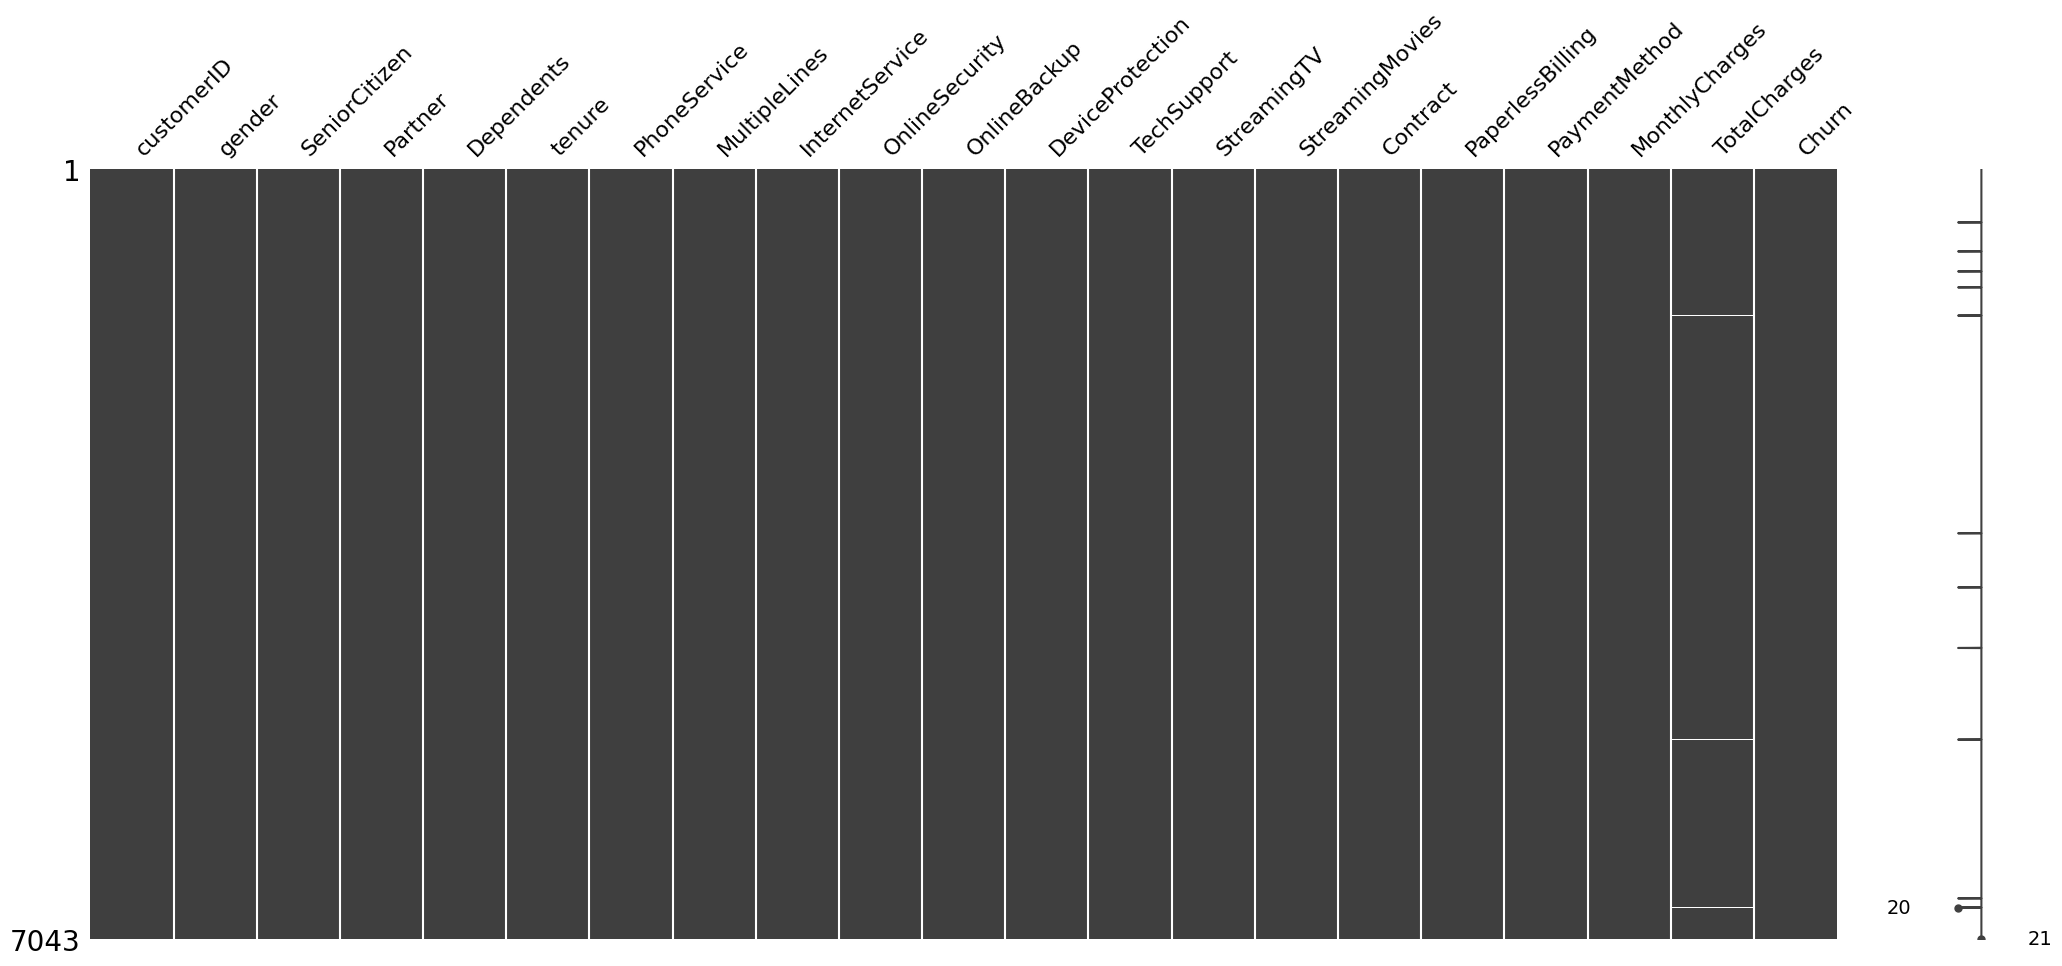

In [17]:
def missing_values_table(df, na_columns_name=False):

    print(msno.matrix(df))

    na_columns = [sütun for sütun in df.columns if df[sütun].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_columns_name:
        return na_columns

na_columns = missing_values_table(df, True)

# Eksik Değer Problemini Çözme

##### TotalCharges değişkeninin NaN değer içerdiği satırların indeks numaraları daha sonra incelenmek adına aşağıda verilmiştir. [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

##### TotalCharges değişkenini ortalama ile doldurmanın, bir aydan daha kısa süre kalan müşteriler için fazla ödeme yapmalarına neden olabileceği düşüncesiyle, bu yöntemi kullanmadık. TotalCharges'ı 0 ile doldurmanın, hiç ödeme yapmamış bir müşterinin ayrılma durumunu mantıksız hale getireceğini göz önünde bulundurarak bu seçeneği de değerlendirmedik. Müşterilerin en az bir ay kalacağı varsayımıyla ve aldıkları hizmetlerle("Contract", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies") kontrat süreleri dikkate alındığında, TotalCharges değişkenini ortalama ile doldurmanın en uygun yöntem olduğuna karar verdik.

In [18]:
df.loc[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


In [19]:
df["TotalCharges"] = df["TotalCharges"].fillna(df.groupby(["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"])["TotalCharges"].transform("mean"))

In [20]:
df.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,2566.863,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,517.148,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,4653.137,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,1179.117,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,2492.271,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,517.148,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,1179.117,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,517.148,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,517.148,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,4354.738,No


# Boxplot ile Sayısal Değişkenlerde Aykırı Değer Analizi

<Axes: xlabel='tenure'>

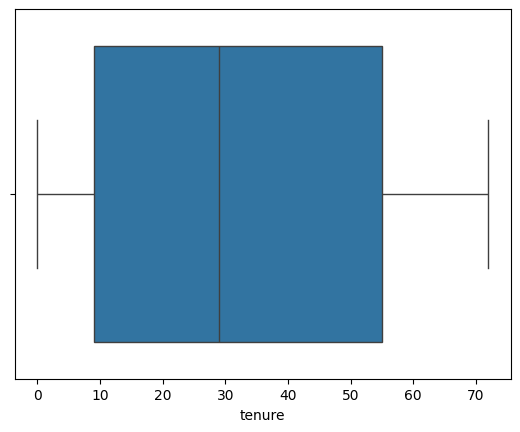

In [21]:
sns.boxplot(x = df.tenure)

<Axes: xlabel='MonthlyCharges'>

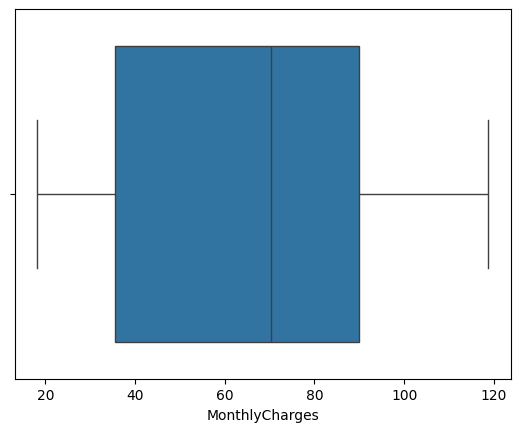

In [22]:
sns.boxplot(x = df.MonthlyCharges)

<Axes: xlabel='TotalCharges'>

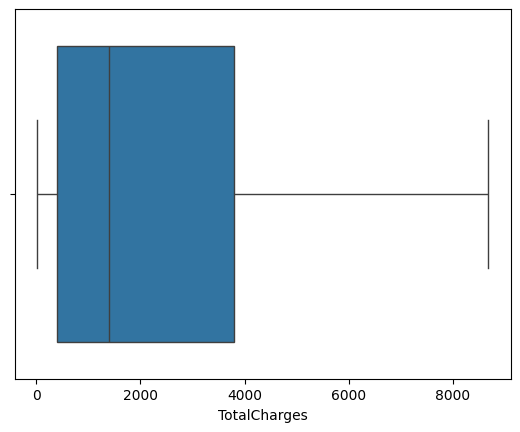

In [23]:
sns.boxplot(x = df.TotalCharges)

##### Müşteri sürelerini kategorize ederek daha anlamlı analizler yapabilmek için müşterilerin kaldıkları toplam ayı gösteren değerleri dört ayrı "Yeni Müşteri" (0-12 ay), "Kısa Süreli Müşteri" (13-37 ay), "Orta Süreli Müşteri" (37-61 ay) ve (61-73 ay) ve "Uzun Süreli Müşteri" (37-61 ay) gruba ayırmaya karar verdik. Bu sınıflandırma, müşteri davranışlarını ve eğilimlerini daha iyi anlamamıza ve segmentasyon stratejileri geliştirmemize yardımcı olur. 

In [24]:
bins = [0, 13, 37, 61, 73]
labels = ['Yeni Müşteri', 'Kısa Süreli Müşteri', 'Orta Süreli Müşteri', 'Uzun Süreli Müşteri']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

print(df['Tenure_Group'].value_counts())

Tenure_Group
Yeni Müşteri           2186
Kısa Süreli Müşteri    1856
Orta Süreli Müşteri    1594
Uzun Süreli Müşteri    1407
Name: count, dtype: int64


### 'PhoneService', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies' sütunlarında bulunan Yes ve No değerlerine bakılarak "Aldıkları Hizmet Sayısı" adında yeni bir sütun oluşturuldu.

In [25]:
df['Aldıkları Hizmet Sayısı'] = (
    (df['PhoneService'] == 'Yes').astype(int) +
    (df['InternetService'].isin(['DSL', 'Fiber optic'])).astype(int) +
    (df['OnlineSecurity'] == 'Yes').astype(int) +
    (df['OnlineBackup'] == 'Yes').astype(int) +
    (df['DeviceProtection'] == 'Yes').astype(int) +
    (df['TechSupport'] == 'Yes').astype(int) +
    (df['StreamingTV'] == 'Yes').astype(int) +
    (df['StreamingMovies'] == 'Yes').astype(int)
    )

### Aldıkları Hizmet Sayısı değerinin 0 olup olmaması değerine bakılarak MonthlyCharges değerinin Aldıkları Hizmet Sayısı değerine bölümü Aldıkları Hizmet Başına Aylık Ortalama Ücreti adında yeni bir sütun oluşturuldu. 

In [26]:
df["Aldıkları Hizmet Başına Aylık Ortalama Ücreti"] = np.where(df['Aldıkları Hizmet Sayısı'] != 0,df['MonthlyCharges'] / df['Aldıkları Hizmet Sayısı'],0)

### Contract sütununda değeri Month-to-month olanlar için 0, "One year", "Two year" değerleri için 1 değerini alan ve müşterinin sözleşmeli olup olmadığını kontrol eden "Sözleşmeli Mi?" adında yeni bir sütun oluşturuldu.

In [27]:
df["Sözleşmeli Mi?"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

##### Müşterinin otomatik ödemem yapıp yapmadığını kontrol etmek için Otomatik Ödeme mi? adında yeni bir sütun oluşturuldu.

In [28]:
df["Otomatik Ödeme mi?"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)


##### InternetService sütununda değeri No olanlar için diğer sütunlardaki(OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies) değerleri de etkilemiş bulunuyor. Bu yüzden OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies sütunlarında No internet service değerini No olarak değiştirildi.

In [29]:
df.loc[df["InternetService"] == "No"].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,Aldıkları Hizmet Sayısı,Aldıkları Hizmet Başına Aylık Ortalama Ücreti,Sözleşmeli Mi?,Otomatik Ödeme mi?
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.950,326.800,No,Kısa Süreli Müşteri,1,18.950,1,1
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.650,1022.950,No,Orta Süreli Müşteri,1,20.650,1,0
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.800,202.250,No,Yeni Müşteri,1,19.800,1,1
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.150,20.150,Yes,Yeni Müşteri,1,20.150,0,0
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.200,20.200,No,Yeni Müşteri,1,20.200,0,1


In [30]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')

df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')

df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')

df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')

df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')

df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

##### PhoneService sütununda değeri No olanlar için MultipleLines sütunundaki değerleri de etkilemiş bulunuyor. Bu yüzden MultipleLines sütunundaki No phone service değeri No olarak değiştirildi.

In [31]:
df.loc[df["PhoneService"] == "No"].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,Aldıkları Hizmet Sayısı,Aldıkları Hizmet Başına Aylık Ortalama Ücreti,Sözleşmeli Mi?,Otomatik Ödeme mi?
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,Yeni Müşteri,2,14.925,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,Orta Süreli Müşteri,4,10.575,1,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750,301.900,No,Yeni Müşteri,2,14.875,0,0
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.650,39.650,Yes,Yeni Müşteri,3,13.217,0,0
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.200,30.200,Yes,Yeni Müşteri,2,15.100,0,0


In [32]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

##### StreamingMovies veya StreamingTV hizmetlerine abone olup olmadığını daha basit ve anlaşılır bir biçimde temsil etmek için Streaming adında yeni bir sütun oluşturuldu. 

In [33]:
df.groupby(["StreamingMovies", "StreamingTV"])["MonthlyCharges"].mean()

StreamingMovies  StreamingTV
No               No            43.756
                 Yes           77.353
Yes              No            76.812
                 Yes           93.237
Name: MonthlyCharges, dtype: float64

In [34]:
df.loc[(df['StreamingMovies'] == 'No') & (df['StreamingTV'] == 'No'), 'Streaming'] = 'No'
df.loc[(df['StreamingMovies'] == 'Yes') | (df['StreamingTV'] == 'Yes'), 'Streaming'] = 'Yes'

# Oluşturulan Yeni Değişkenlerin İncelenmesi

In [35]:
numeric_columns, categoric_columns, numeric_but_categoric_columns, categoric_but_cardinal_columns = grab_column_name(df)


Numeric Columns=> ['tenure', 'MonthlyCharges', 'TotalCharges', 'Aldıkları Hizmet Başına Aylık Ortalama Ücreti']

Categoric Columns=> ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure_Group', 'Streaming', 'Aldıkları Hizmet Sayısı', 'Sözleşmeli Mi?', 'Otomatik Ödeme mi?']

Numeric but Categoric Columns=> ['Aldıkları Hizmet Sayısı', 'Sözleşmeli Mi?', 'Otomatik Ödeme mi?']

Categoric but Cardinal Columns=> ['customerID']


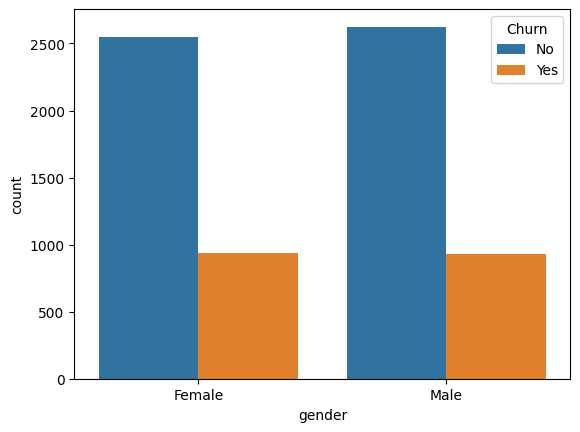

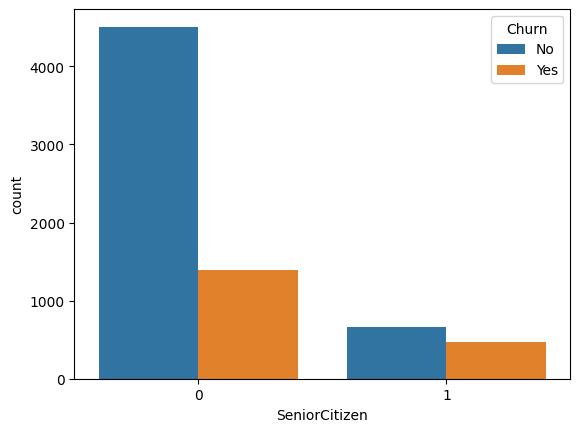

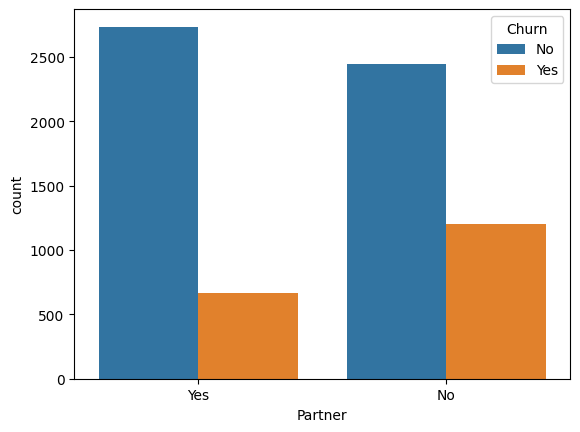

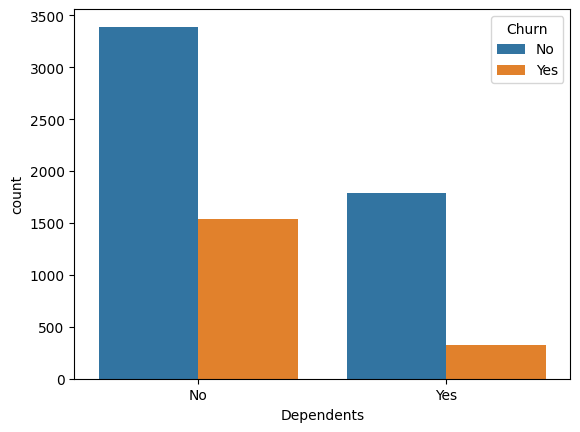

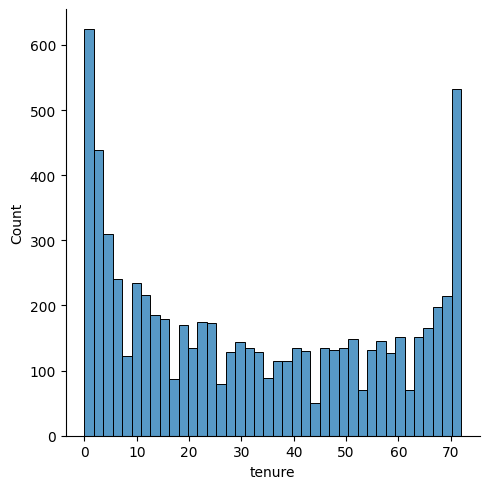

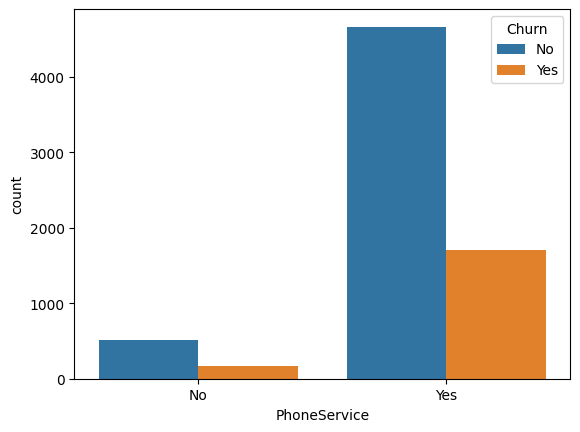

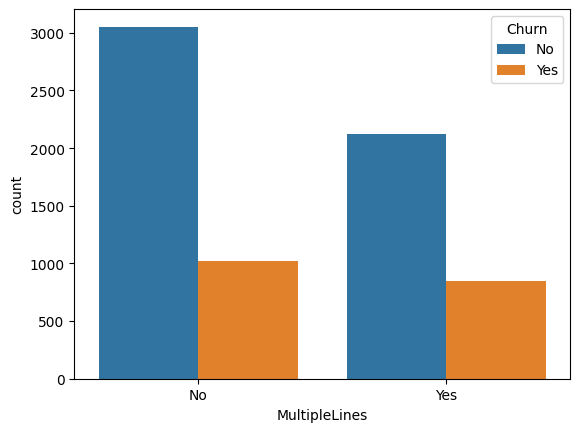

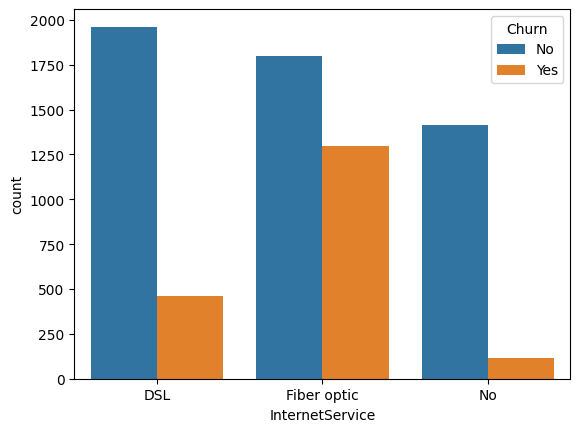

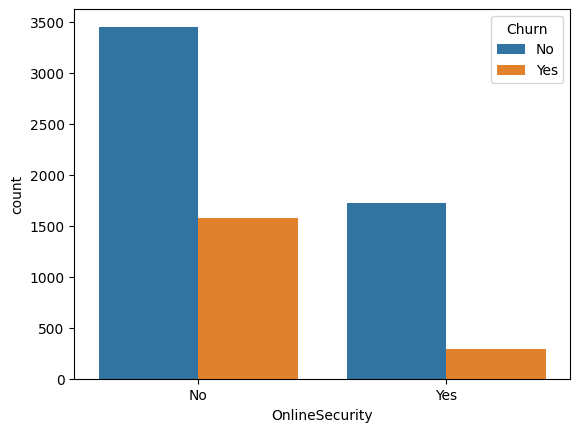

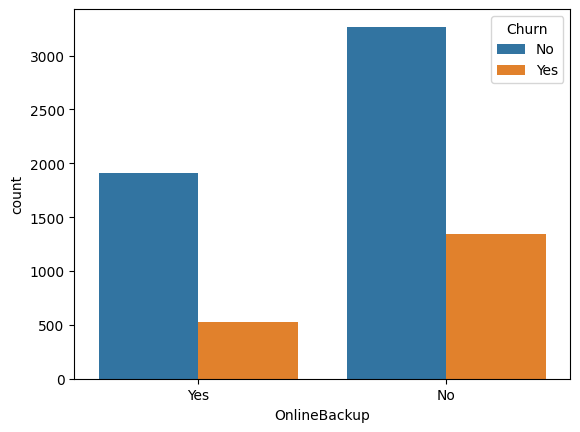

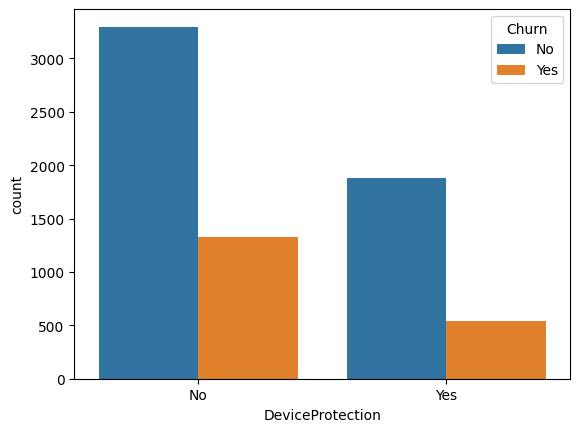

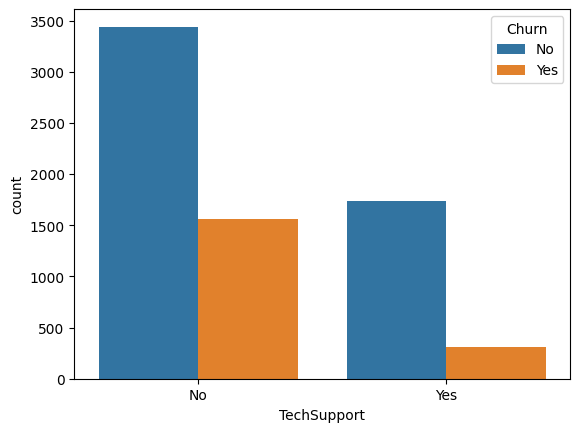

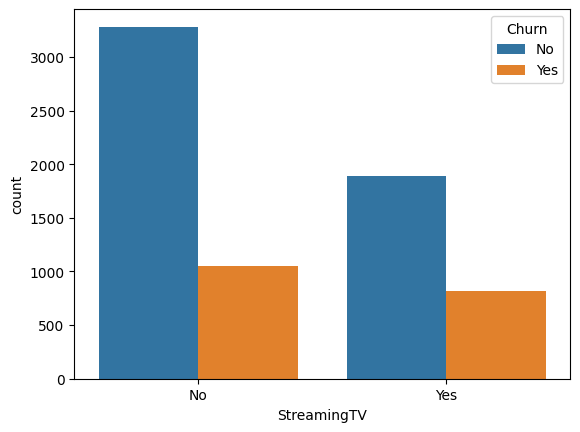

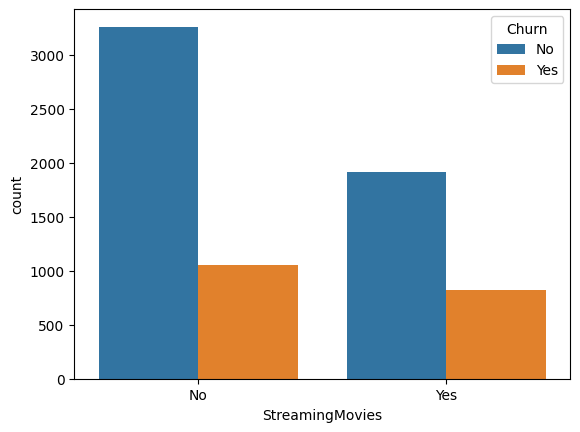

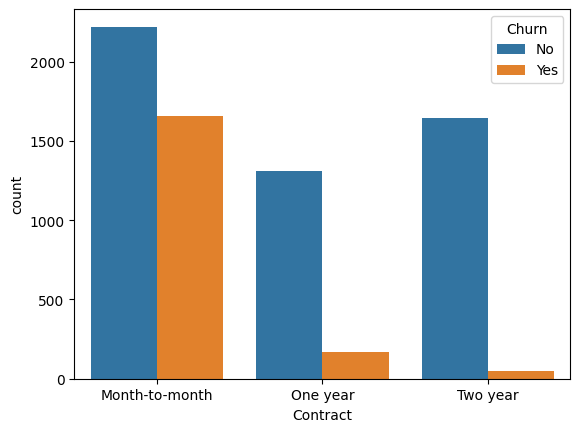

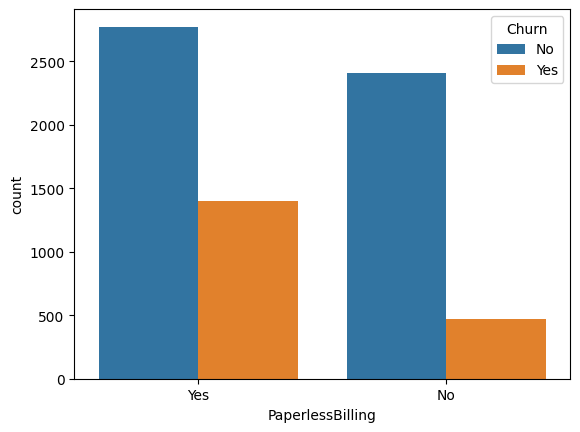

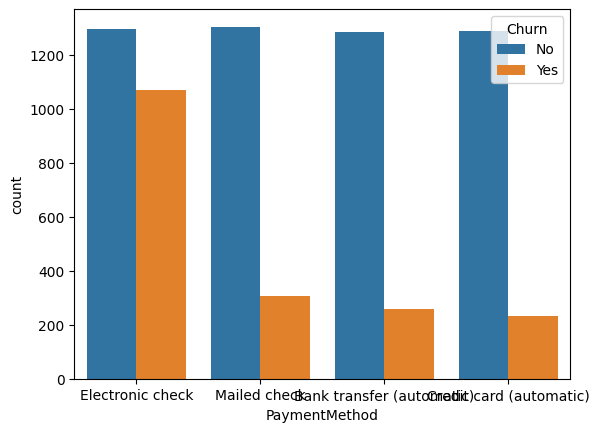

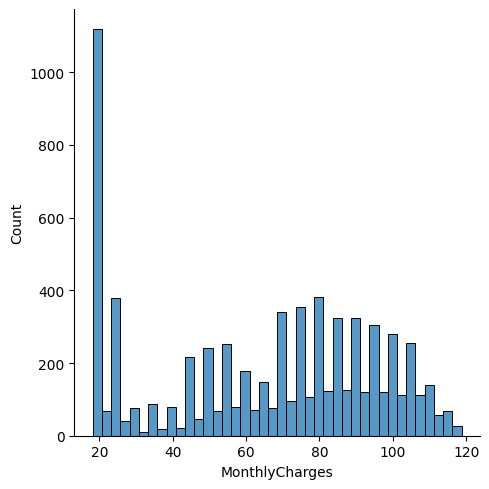

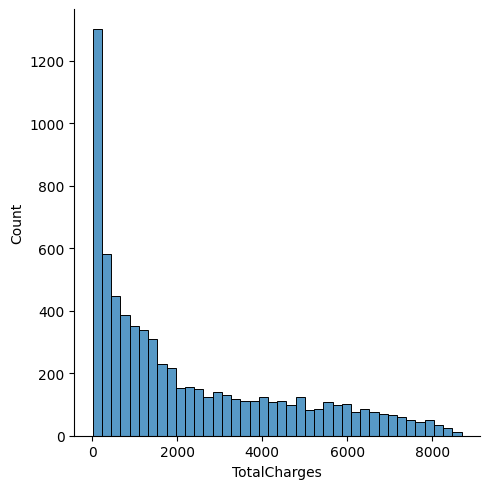

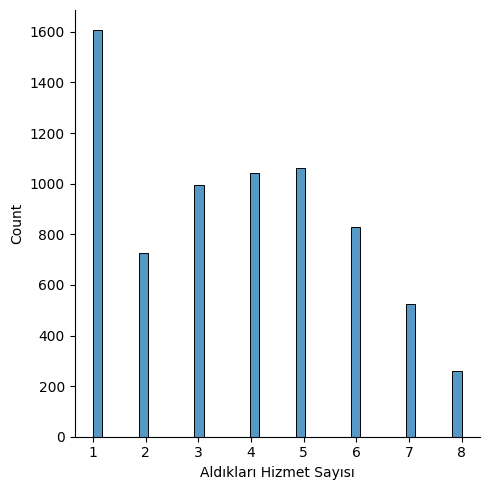

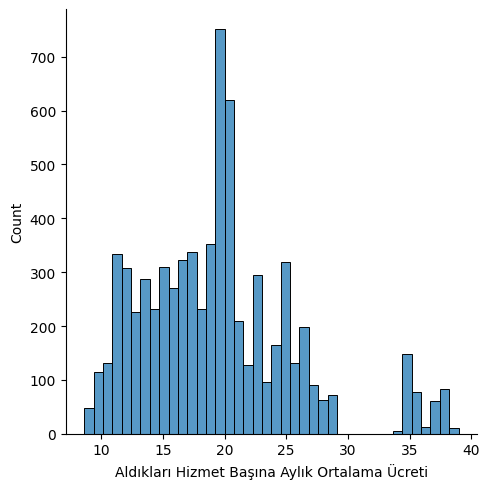

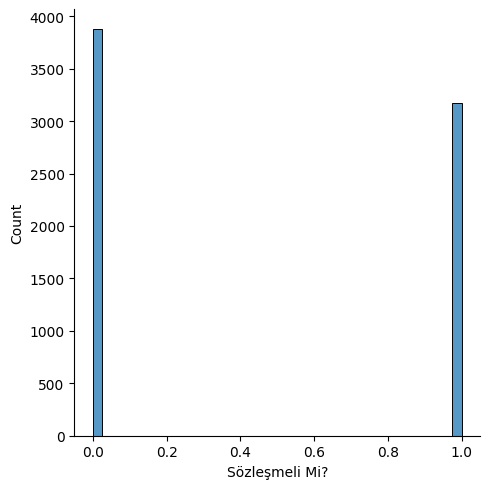

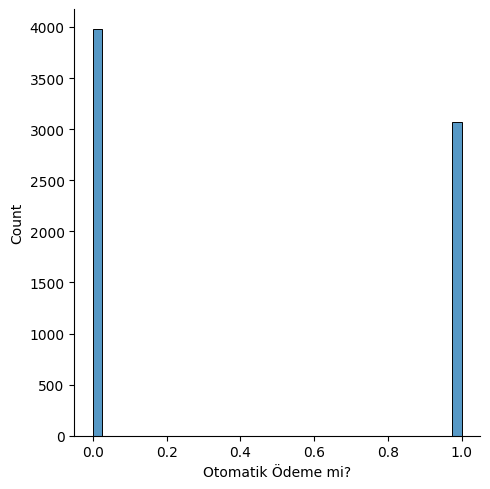

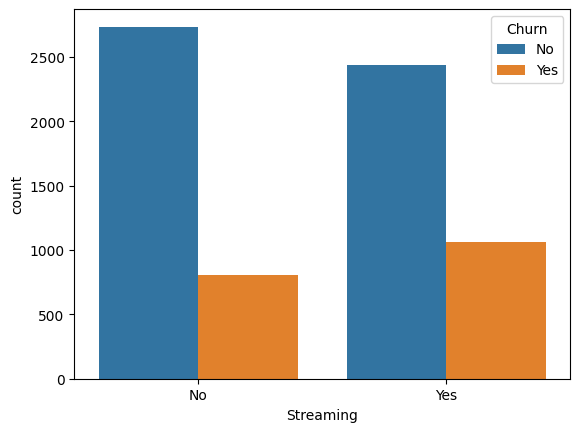

In [36]:
def target_summary_with_columns(df,target_column):
        
    for sütun in df.columns:
        if sütun == target_column:
            pass
        elif df[sütun].dtype=='O':
            sns.countplot(data=df,x=sütun,hue=target_column)
        elif df[sütun].dtype in ['int_', 'iznt8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64','float_', 'float16', 'float32','float64']:
            sns.displot(df[sütun].dropna(), bins=40)
        plt.show()

target_summary_with_columns(df.drop(categoric_but_cardinal_columns,axis=1),'Churn')

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


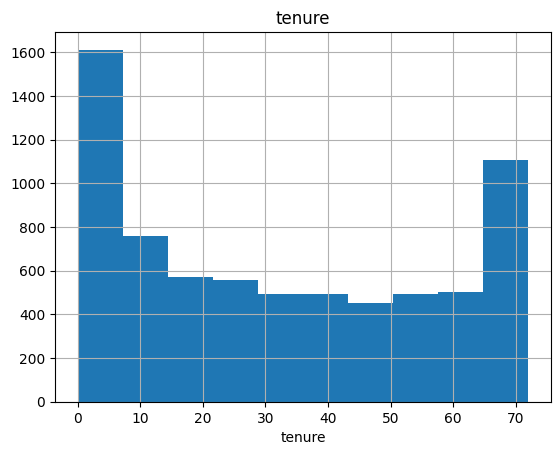

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


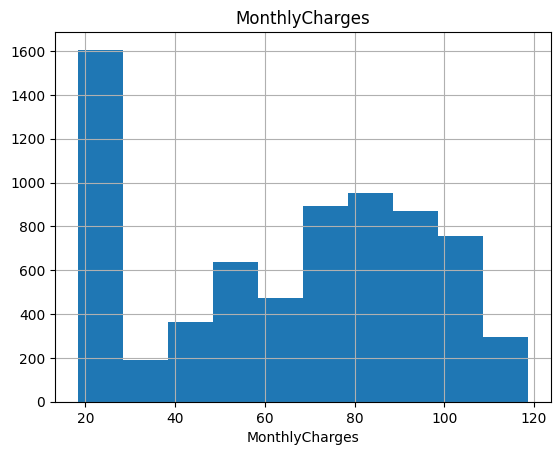

count   7043.000
mean    2282.828
std     2265.814
min       18.800
5%        49.650
10%       84.610
20%      267.370
30%      551.710
40%      944.490
50%     1397.300
60%     2049.850
70%     3140.560
80%     4473.270
90%     5973.690
95%     6921.025
99%     8039.256
max     8684.800
Name: TotalCharges, dtype: float64


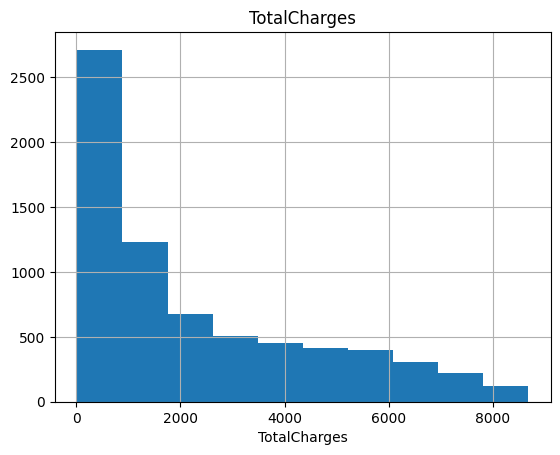

count   7043.000
mean      19.366
std        6.146
min        8.650
5%        11.160
10%       11.850
20%       13.844
30%       15.731
40%       17.517
50%       19.300
60%       20.000
70%       20.950
80%       23.950
90%       26.563
95%       34.772
99%       37.539
max       38.950
Name: Aldıkları Hizmet Başına Aylık Ortalama Ücreti, dtype: float64


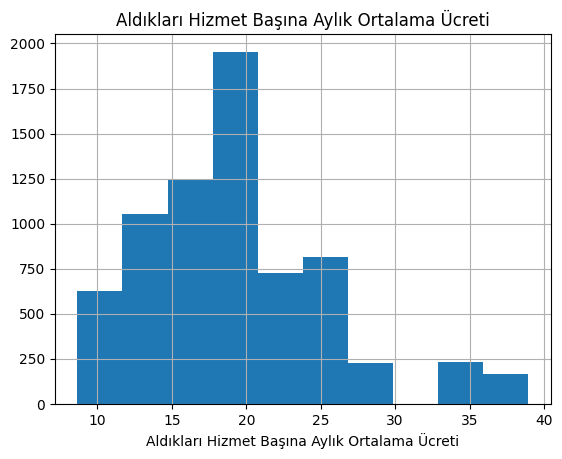

In [37]:
def numeric_columns_summary(df, sütun, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[sütun].describe(quantiles).T)

    if plot:
        df[sütun].hist()
        plt.xlabel(sütun)
        plt.title(sütun)
        plt.show(block=True)

for sütun in numeric_columns:
    numeric_columns_summary(df, sütun, plot=True)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


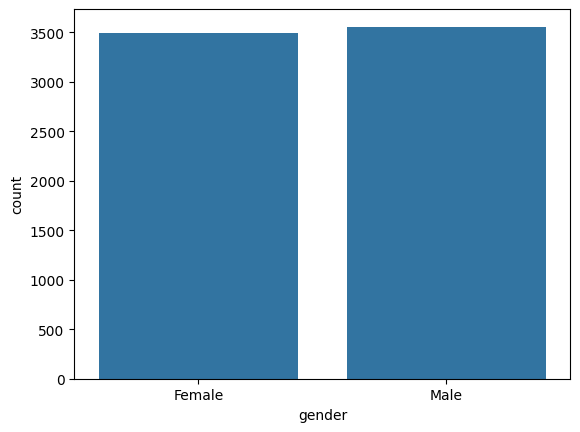

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


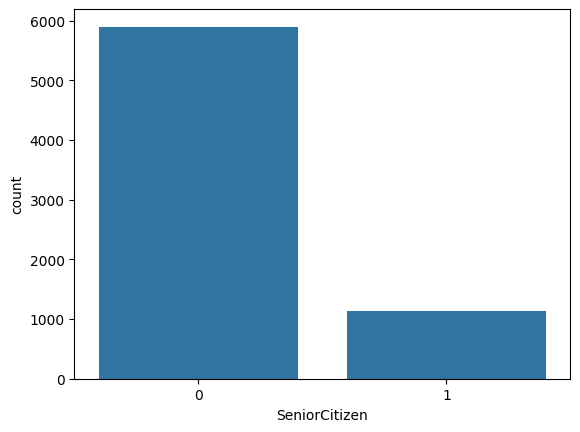

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################


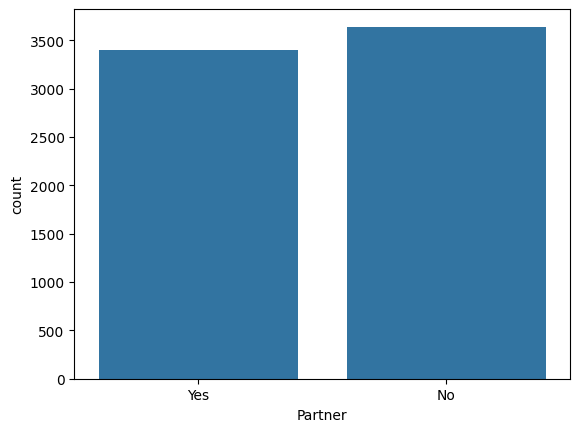

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################


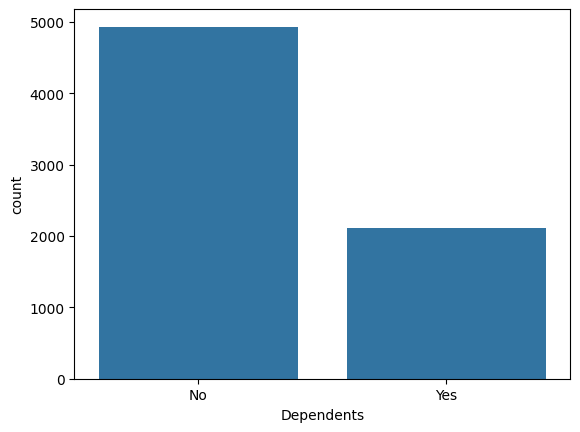

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################


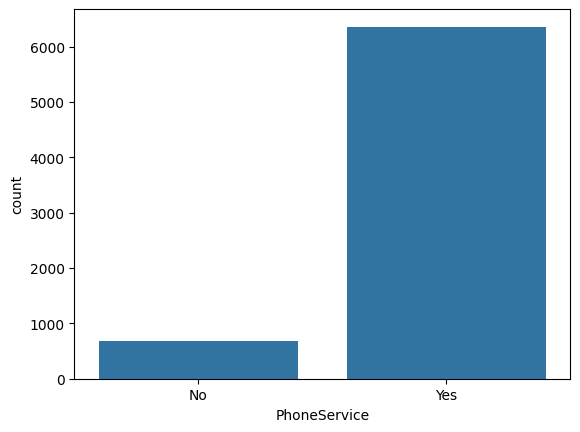

               MultipleLines  Ratio
MultipleLines                      
No                      4072 57.816
Yes                     2971 42.184
##########################################


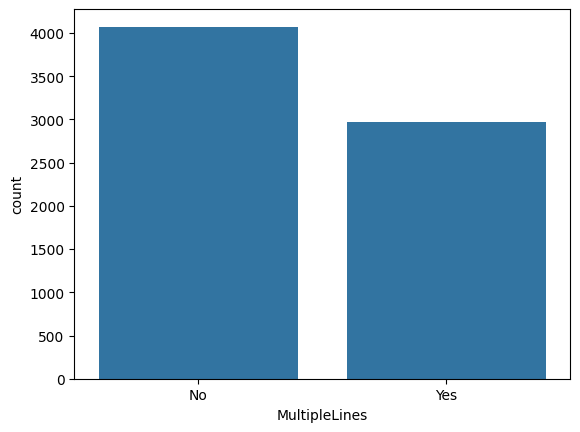

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########################################


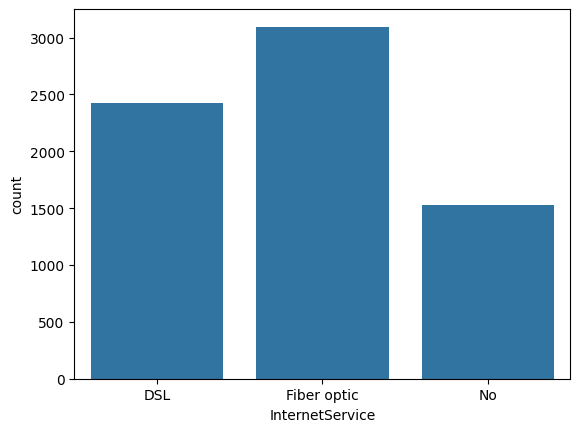

                OnlineSecurity  Ratio
OnlineSecurity                       
No                        5024 71.333
Yes                       2019 28.667
##########################################


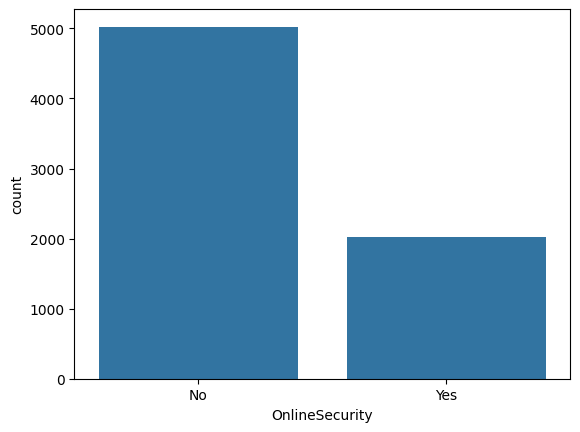

              OnlineBackup  Ratio
OnlineBackup                     
No                    4614 65.512
Yes                   2429 34.488
##########################################


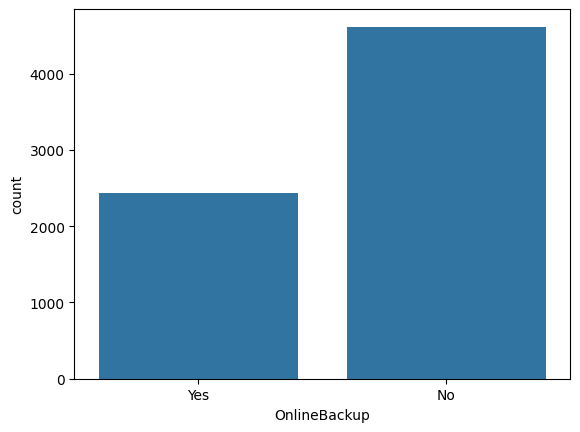

                  DeviceProtection  Ratio
DeviceProtection                         
No                            4621 65.611
Yes                           2422 34.389
##########################################


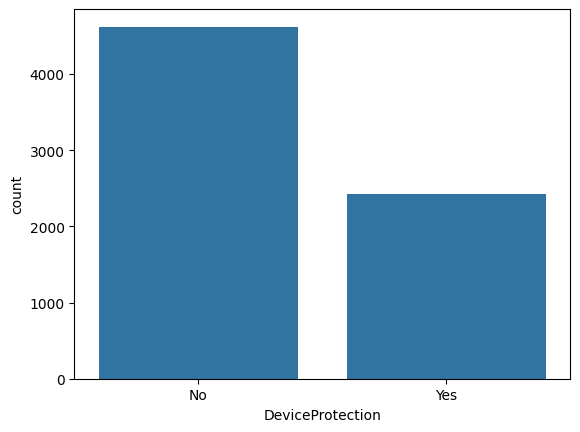

             TechSupport  Ratio
TechSupport                    
No                  4999 70.978
Yes                 2044 29.022
##########################################


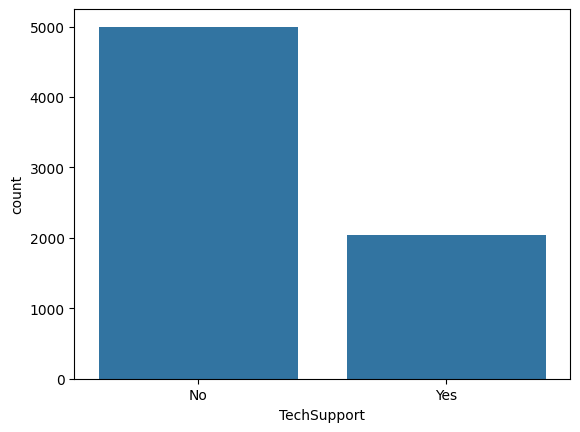

             StreamingTV  Ratio
StreamingTV                    
No                  4336 61.565
Yes                 2707 38.435
##########################################


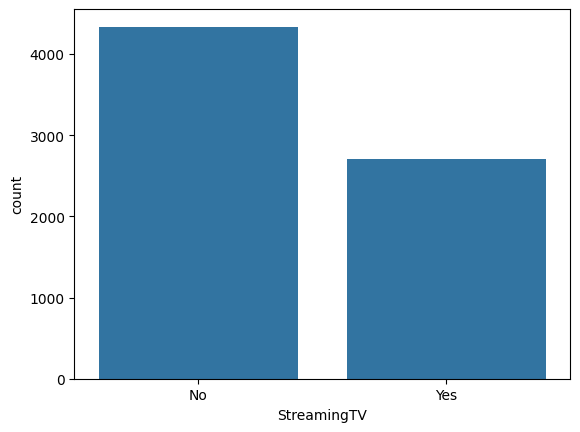

                 StreamingMovies  Ratio
StreamingMovies                        
No                          4311 61.210
Yes                         2732 38.790
##########################################


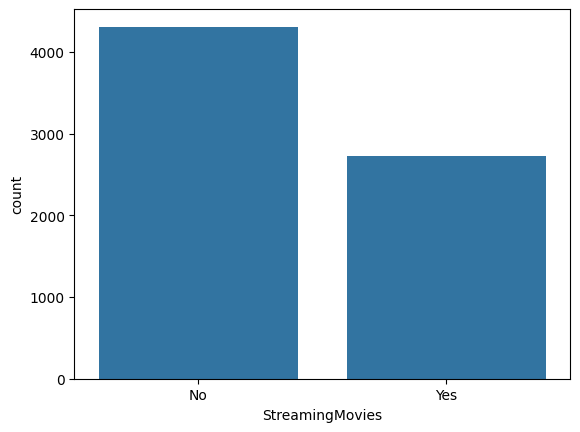

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


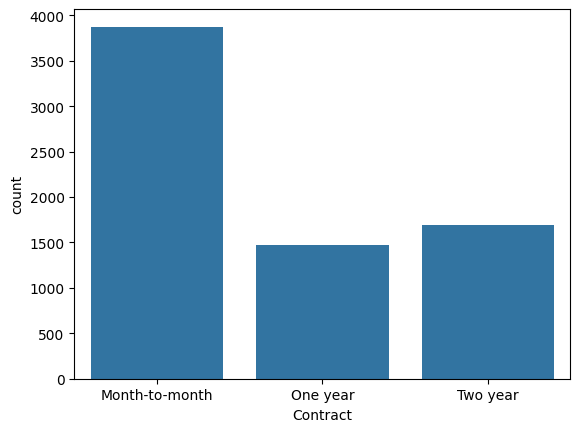

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
##########################################


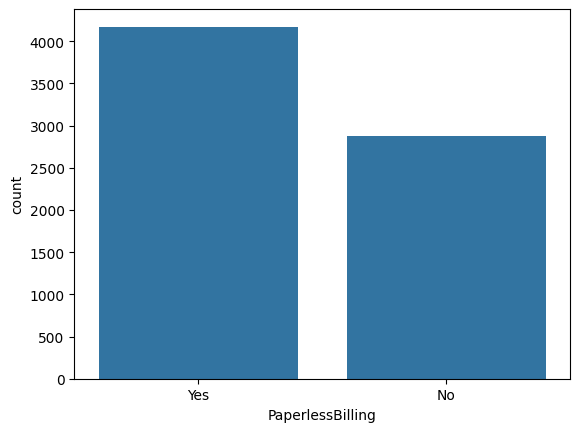

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


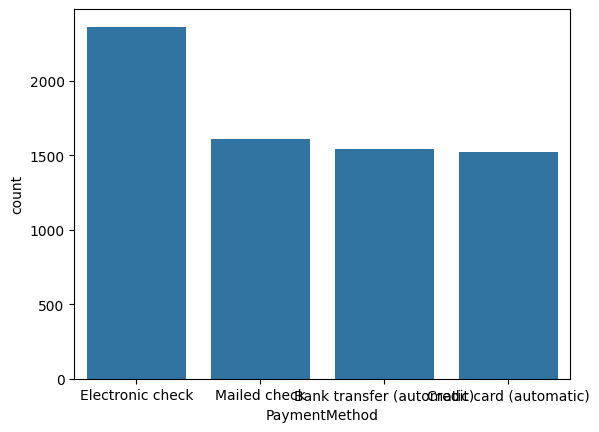

       Churn  Ratio
Churn              
No      5174 73.463
Yes     1869 26.537
##########################################


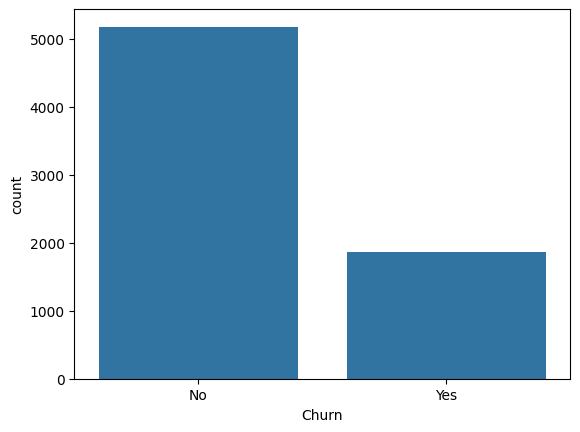

                     Tenure_Group  Ratio
Tenure_Group                            
Yeni Müşteri                 2186 31.038
Kısa Süreli Müşteri          1856 26.352
Orta Süreli Müşteri          1594 22.632
Uzun Süreli Müşteri          1407 19.977
##########################################


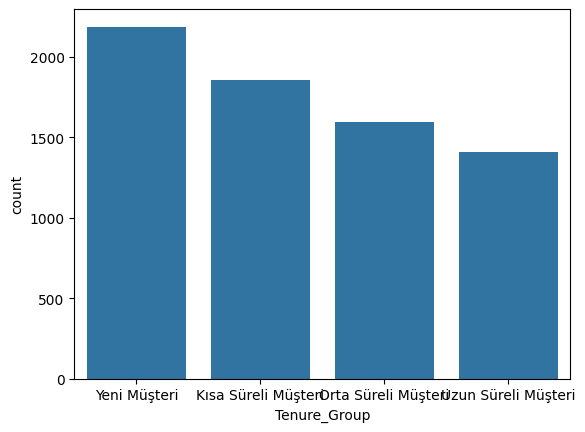

           Streaming  Ratio
Streaming                  
No              3544 50.319
Yes             3499 49.681
##########################################


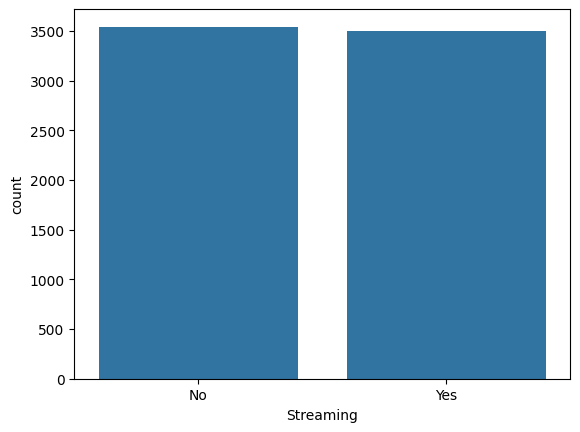

                         Aldıkları Hizmet Sayısı  Ratio
Aldıkları Hizmet Sayısı                                
1                                           1606 22.803
5                                           1062 15.079
4                                           1041 14.781
3                                            996 14.142
6                                            827 11.742
2                                            727 10.322
7                                            525  7.454
8                                            259  3.677
##########################################


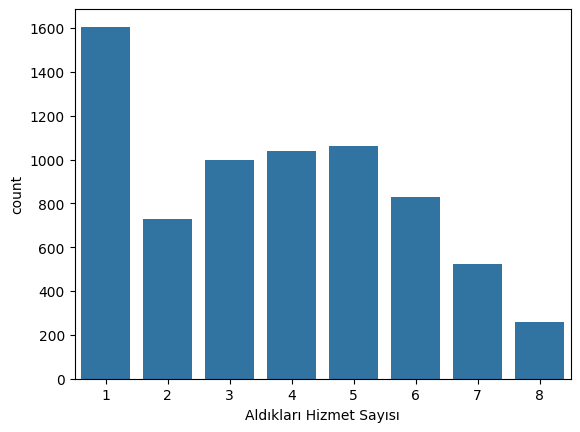

                Sözleşmeli Mi?  Ratio
Sözleşmeli Mi?                       
0                         3875 55.019
1                         3168 44.981
##########################################


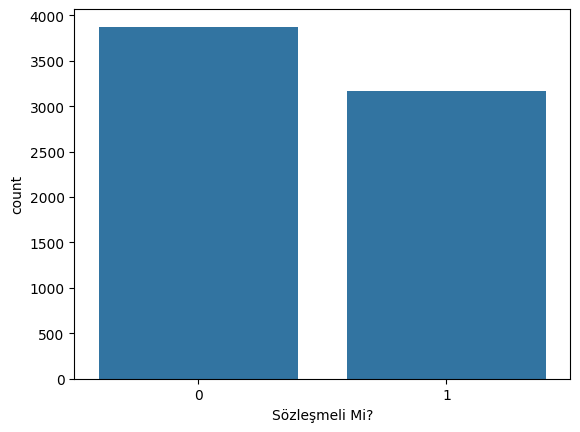

                    Otomatik Ödeme mi?  Ratio
Otomatik Ödeme mi?                           
0                                 3977 56.467
1                                 3066 43.533
##########################################


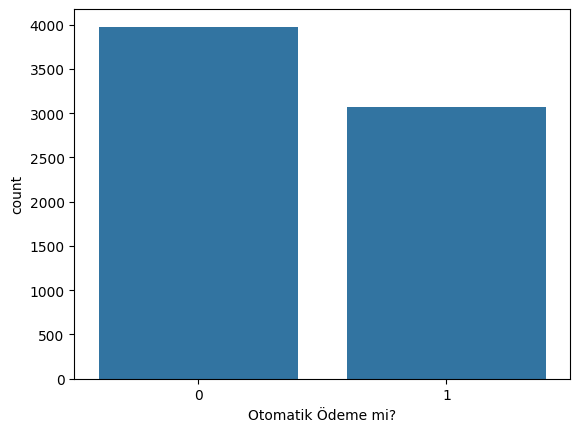

In [38]:
def categoric_columns_summary(df, sütun, plot=False):

    if df[sütun].dtypes == "bool":
        df[sütun] = df[sütun].astype(int)

        print(pd.DataFrame({sütun: df[sütun].value_counts(),
                            "Ratio": 100 * df[sütun].value_counts() / len(df)}))
        print("##########################################")

        if plot:
            sns.countplot(x=df[sütun], data=df)
            plt.show(block=True)
    else:
        print(pd.DataFrame({sütun: df[sütun].value_counts(),
                            "Ratio": 100 * df[sütun].value_counts() / len(df)}))
        print("##########################################")

        if plot:
            sns.countplot(x=df[sütun], data=df)
            plt.show(block=True)

for sütun in categoric_columns:
    categoric_columns_summary(df, sütun, plot=True)

In [39]:
for column in df.columns:
    print("###########################################################################################################################")
    print(f"Sütun: {column}")
    print(f"Sütun Veri Tipi: {df[column].dtype}")
    print(f"Unique değerler: {df[column].unique()}")
    print(f"Unique değer sayısı: {len(df[column].unique())}")


###########################################################################################################################
Sütun: customerID
Sütun Veri Tipi: object
Unique değerler: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique değer sayısı: 7043
###########################################################################################################################
Sütun: gender
Sütun Veri Tipi: object
Unique değerler: ['Female' 'Male']
Unique değer sayısı: 2
###########################################################################################################################
Sütun: SeniorCitizen
Sütun Veri Tipi: object
Unique değerler: [0 1]
Unique değer sayısı: 2
###########################################################################################################################
Sütun: Partner
Sütun Veri Tipi: object
Unique değerler: ['Yes' 'No']
Unique değer sayısı: 2
#######################################################

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   customerID                                     7043 non-null   object  
 1   gender                                         7043 non-null   object  
 2   SeniorCitizen                                  7043 non-null   object  
 3   Partner                                        7043 non-null   object  
 4   Dependents                                     7043 non-null   object  
 5   tenure                                         7043 non-null   int64   
 6   PhoneService                                   7043 non-null   object  
 7   MultipleLines                                  7043 non-null   object  
 8   InternetService                                7043 non-null   object  
 9   OnlineSecurity                           

# Yorumlama

### Contract değeri Month-to-month olan Yeni Müşteri ve Kısa Süreli Müşteri grubunun sayısı fazla olmasına rağmen aynı müşteri grubunun Contract değeri One year ve Two year olanların müşteri sayısında ciddi bir düşüş yaşandığı gözle görülüyor.

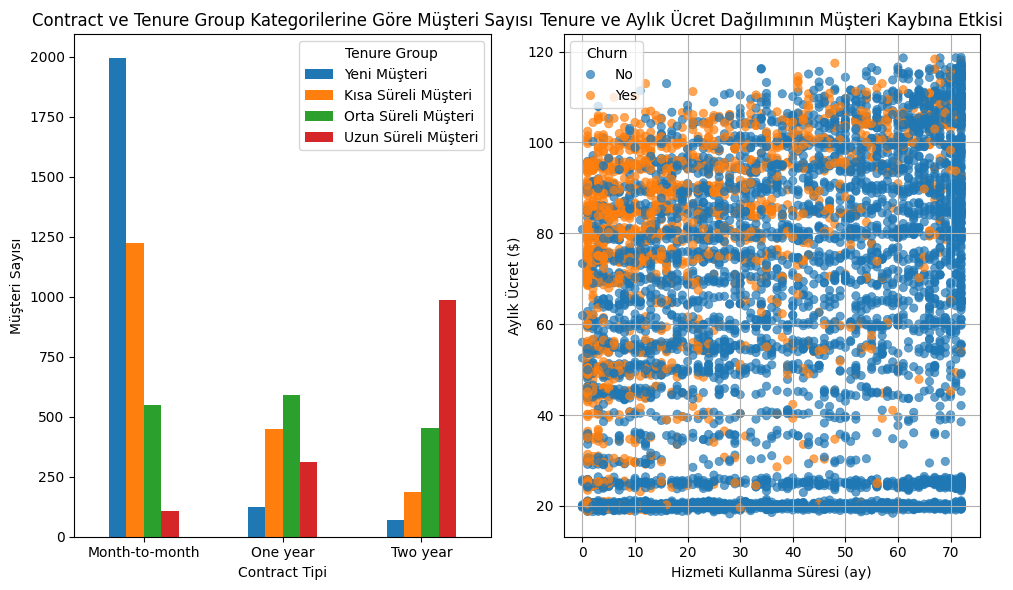

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  

pd.crosstab(df['Contract'], df['Tenure_Group']).plot(kind='bar', ax=axes[0], figsize=(10, 6))
axes[0].set_title('Contract ve Tenure Group Kategorilerine Göre Müşteri Sayısı')
axes[0].set_xlabel('Contract Tipi')
axes[0].set_ylabel('Müşteri Sayısı')
axes[0].legend(title='Tenure Group')
axes[0].set_xticks(range(len(df['Contract'].unique())))
axes[0].set_xticklabels(df['Contract'].unique(), rotation=0)


sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, alpha=0.7, edgecolor=None, ax=axes[1])
axes[1].set_title('Tenure ve Aylık Ücret Dağılımının Müşteri Kaybına Etkisi')
axes[1].set_xlabel('Hizmeti Kullanma Süresi (ay)')
axes[1].set_ylabel('Aylık Ücret ($)')
axes[1].grid(True)


plt.tight_layout()
plt.show()

### Elektronik çekle ödeme yapan müşterilerin büyük bir kısmının kontratları aydan aya olup, bu müşterilerin ayrılma oranı diğerlerine göre daha yüksektir. Bu nedenle, elektronik çekle ödeme yapanların kayıp oranı grafikte daha fazladır.

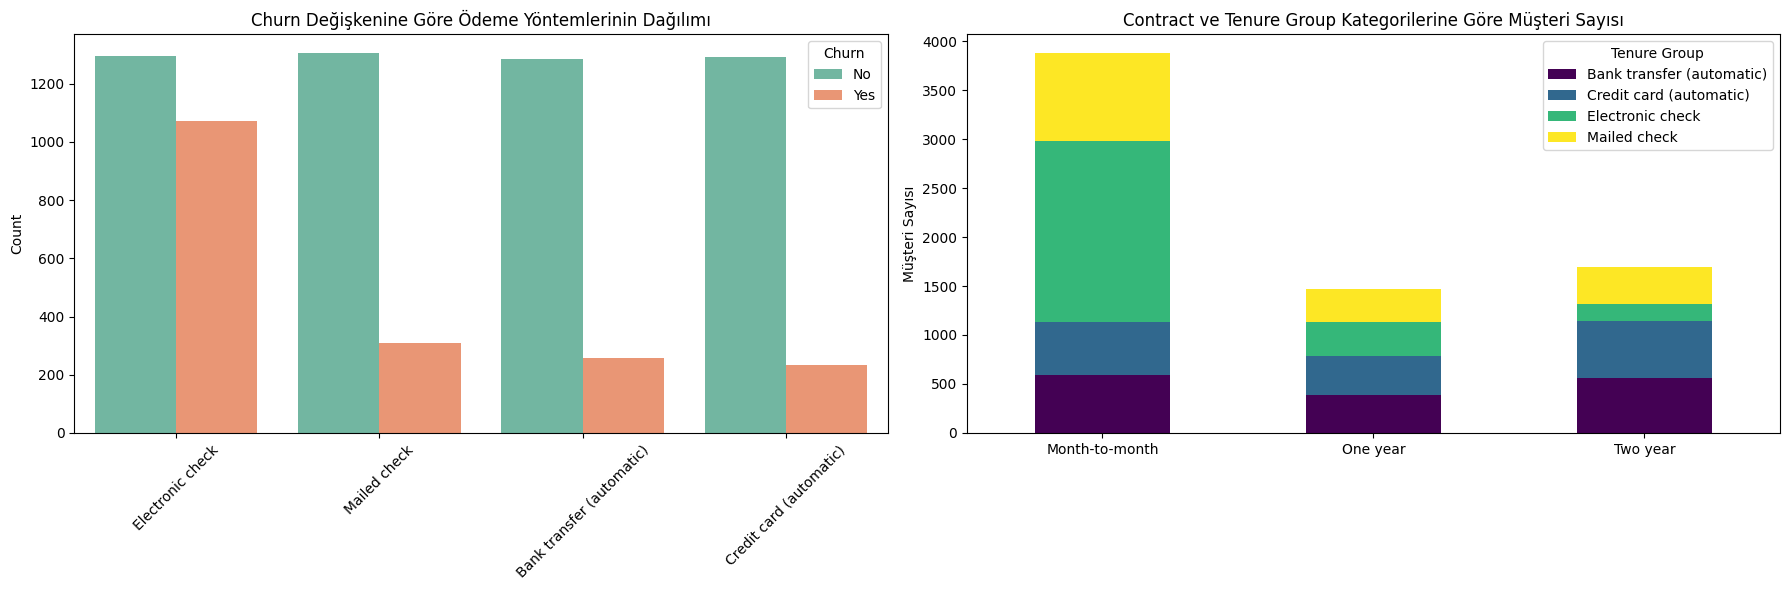

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0], palette='Set2')
axes[0].set_title('Churn Değişkenine Göre Ödeme Yöntemlerinin Dağılımı')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Churn', loc='upper right')

tenure_counts = pd.crosstab(df['Contract'], df['PaymentMethod'])
tenure_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Contract ve Tenure Group Kategorilerine Göre Müşteri Sayısı')
axes[1].set_xlabel('')
axes[1].set_ylabel('Müşteri Sayısı')
axes[1].legend(title='Tenure Group')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

##### Partner sahibi olan kadınlar ayrılma oranı düşükken, partneri olmayan kadınlarda ayrılma oranı yüksektir, partner sahibi olan erkeklerde ayrılma oranı partneri olmayanlara göre daha düşüktür.

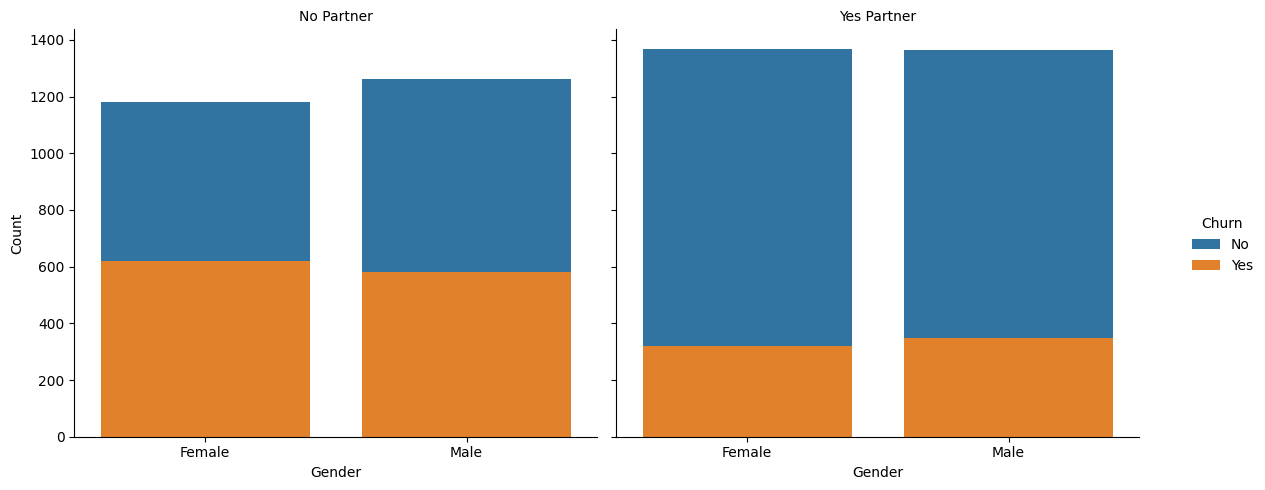

In [43]:
churn_counts = df.groupby(['gender', 'Partner', 'Churn']).size().reset_index(name='Count')

g = sns.FacetGrid(churn_counts, col='Partner', hue='Churn', height=5, aspect=1.2, margin_titles=True)
g.map(sns.barplot, 'gender', 'Count')
g.set_axis_labels('Gender', 'Count')
g.set_titles(col_template="{col_name} Partner")
g.add_legend(title='Churn')

plt.show()

# MODEL

In [44]:
ohe_colums = ["InternetService", "Contract", "PaymentMethod", "Tenure_Group"]

def one_hot_encoder(df, categorical_column, drop_first=True):
    df = pd.get_dummies(df, columns=[categorical_column], drop_first=drop_first)
    return df

for sütun in ohe_colums:
    df = one_hot_encoder(df, sütun)

In [45]:
binary_columns = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", 
                  "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Streaming", "Churn"]

def label_encoder(df, sütun):
    labelencoder = LabelEncoder()
    df[sütun] = labelencoder.fit_transform(df[sütun])
    
    classes = labelencoder.classes_
    mapping = {cls: idx for idx, cls in enumerate(classes)}
    print(f"Sütun: {sütun}")
    print("Etiket Değerleri ve Sınıf Karşılıkları:")
    for cls, idx in mapping.items():
        print(f"{cls} -> {idx}")
    print()
    
    return df

for sütun in binary_columns:
    df = label_encoder(df, sütun)

Sütun: gender
Etiket Değerleri ve Sınıf Karşılıkları:
Female -> 0
Male -> 1

Sütun: SeniorCitizen
Etiket Değerleri ve Sınıf Karşılıkları:
0 -> 0
1 -> 1

Sütun: Partner
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: Dependents
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: PhoneService
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: MultipleLines
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: OnlineSecurity
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: OnlineBackup
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: DeviceProtection
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: TechSupport
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: StreamingTV
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: StreamingMovies
Etiket Değerleri ve Sınıf Karşılıkları:
No -> 0
Yes -> 1

Sütun: PaperlessBilling
Etiket Değerleri ve Sınıf Karşılıkları:
No

Model: KNN
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.62      0.48      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



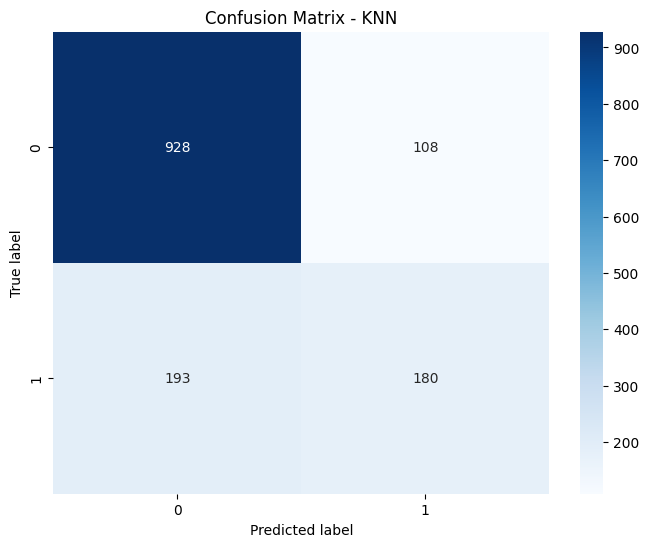

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



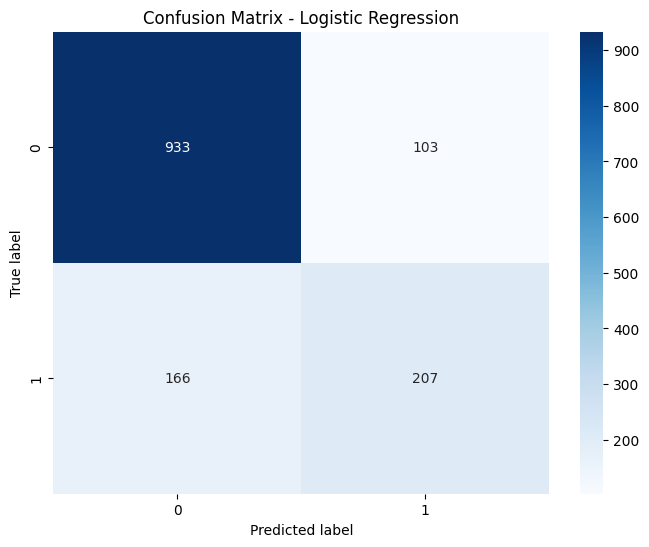

Model: Logistic Regression (ElasticNet)
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.63      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



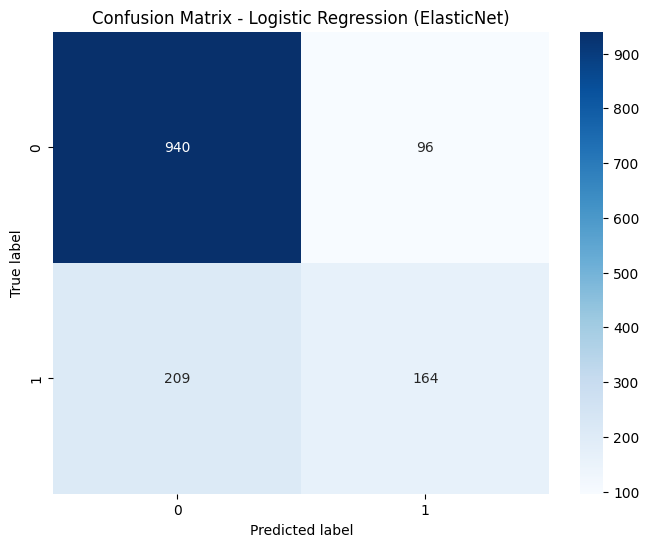

Model: Ridge Classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



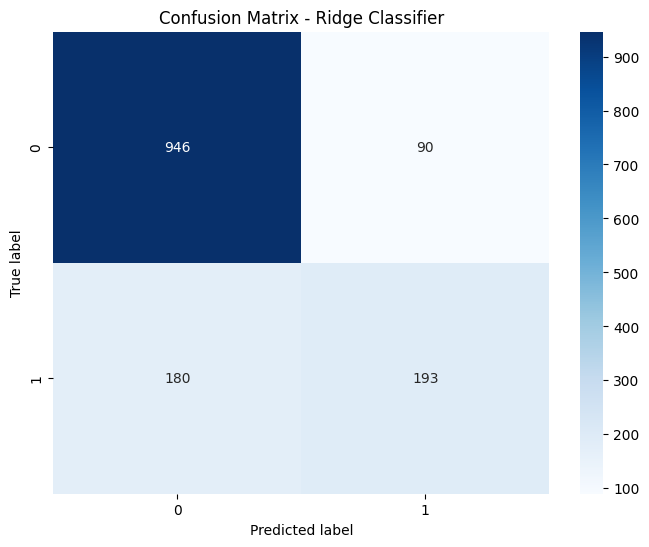

Model: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



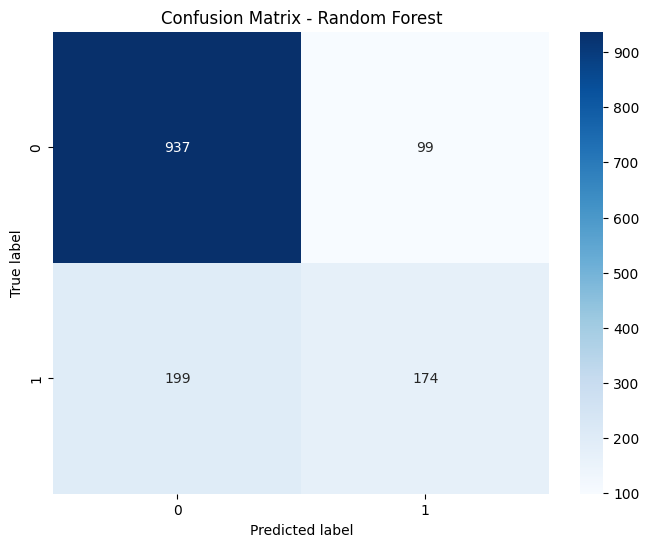

Model: CART
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.52      0.51       373

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.74      0.74      0.74      1409



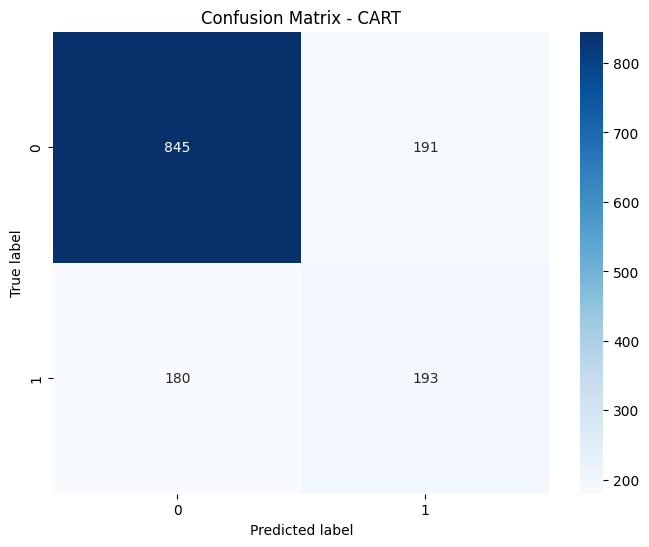

Model: GBM
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



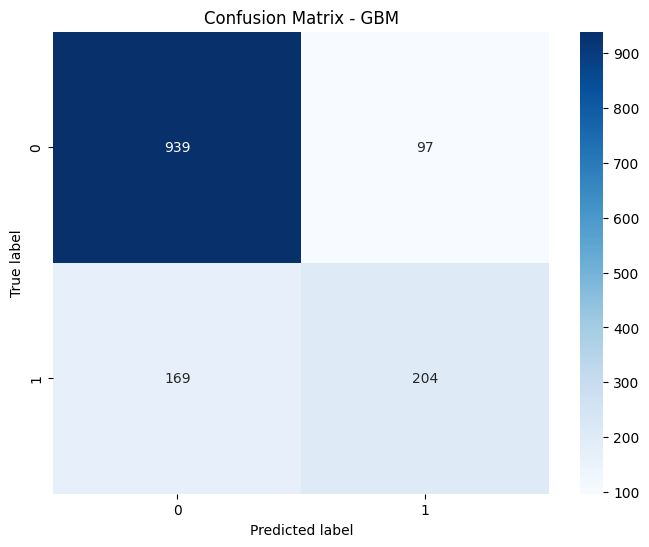

Model: XGBoost
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



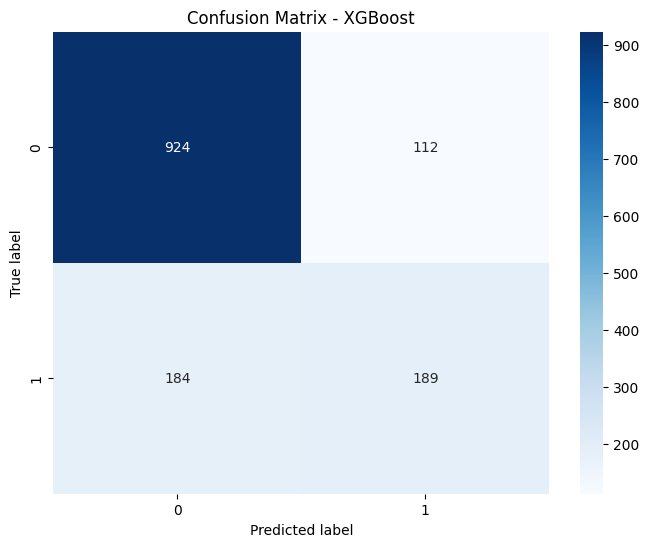

Model: Adaboost
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



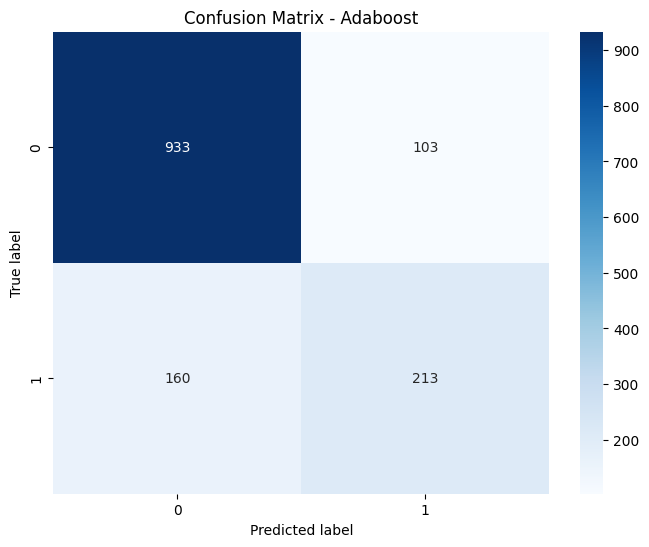

Model: CatBoost
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



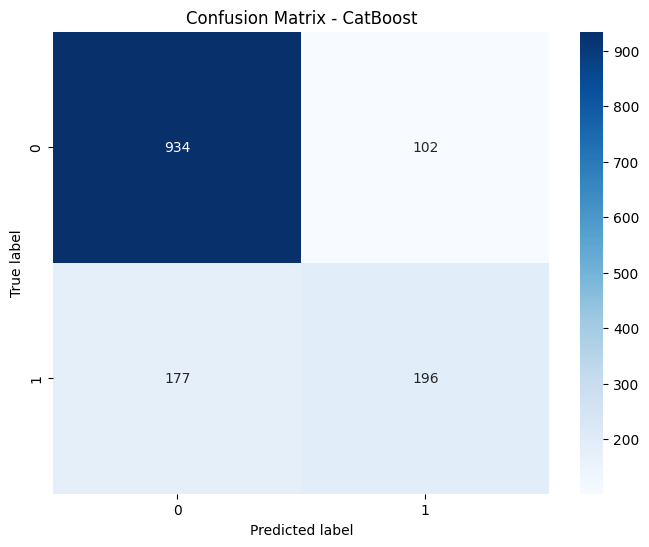

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1036
           1       0.51      0.82      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



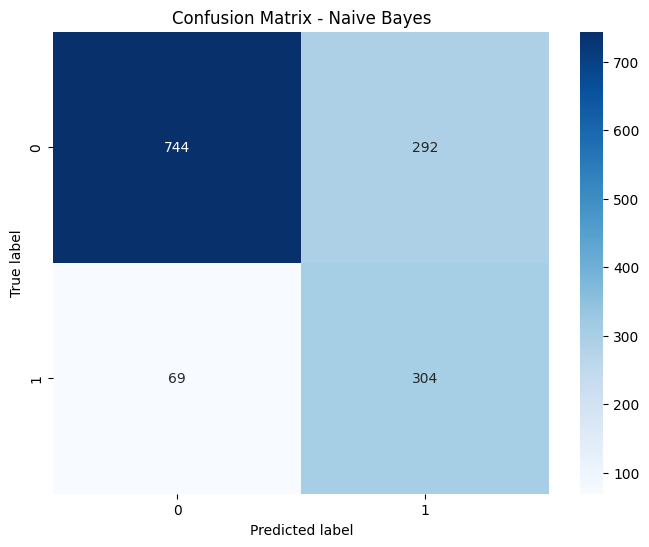

Model: Naive Bayes (Multinomial)
              precision    recall  f1-score   support

           0       0.88      0.60      0.72      1036
           1       0.41      0.78      0.54       373

    accuracy                           0.65      1409
   macro avg       0.65      0.69      0.63      1409
weighted avg       0.76      0.65      0.67      1409



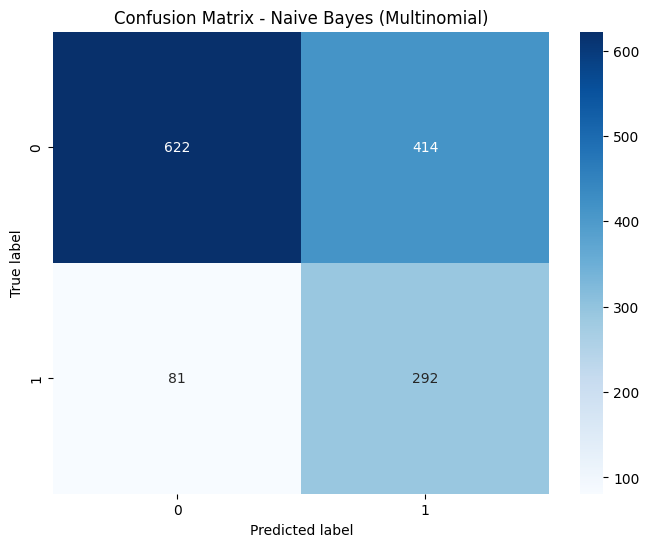

Model: Naive Bayes (Complement)
              precision    recall  f1-score   support

           0       0.89      0.60      0.71      1036
           1       0.41      0.79      0.54       373

    accuracy                           0.65      1409
   macro avg       0.65      0.69      0.63      1409
weighted avg       0.76      0.65      0.67      1409



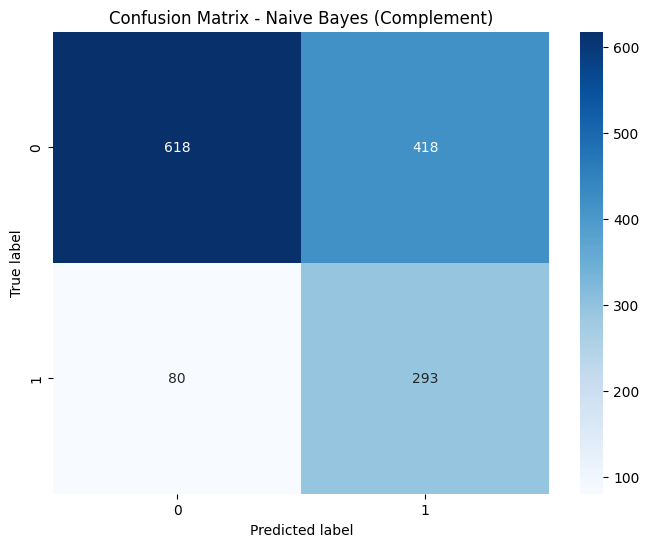

Model: LDA
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



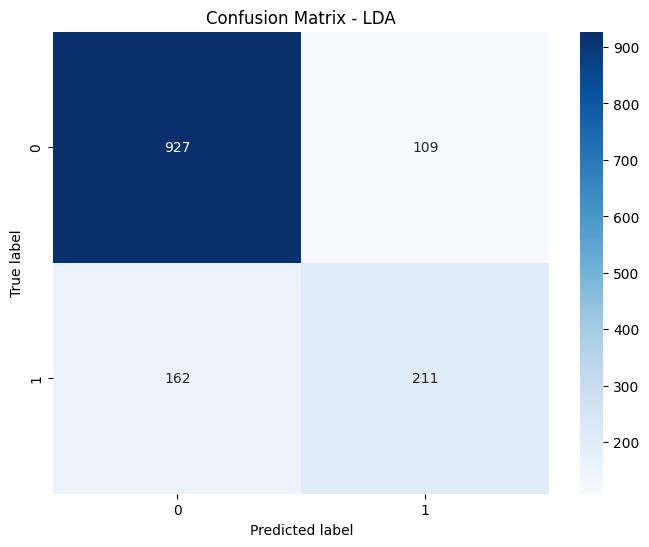

Model: QDA
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1036
           1       0.50      0.83      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409



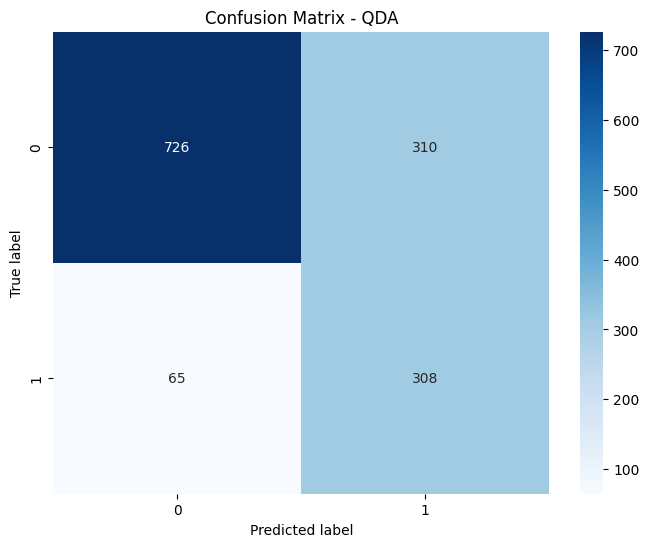

Model: Extra Trees
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.46      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



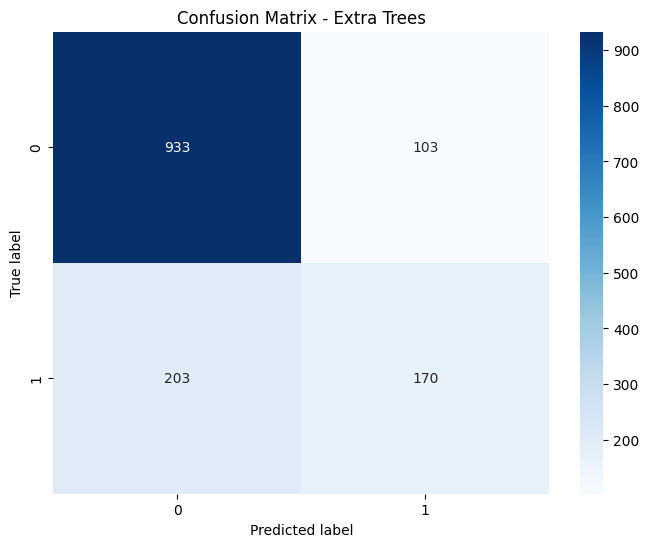

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Model: LightGBM
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



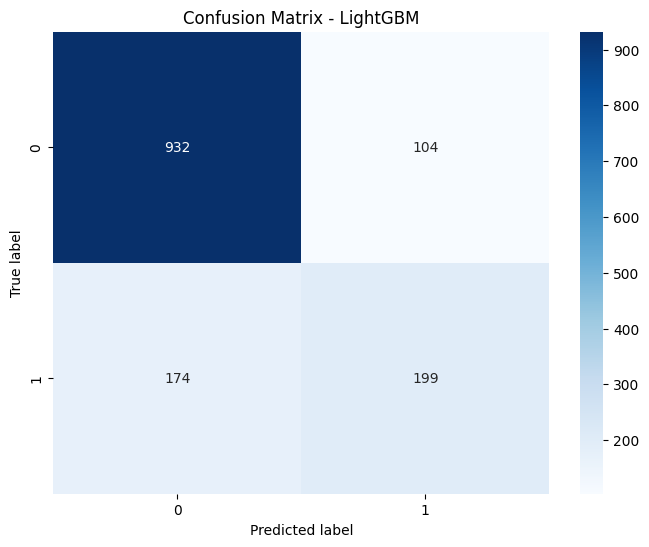

Model: Hist Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



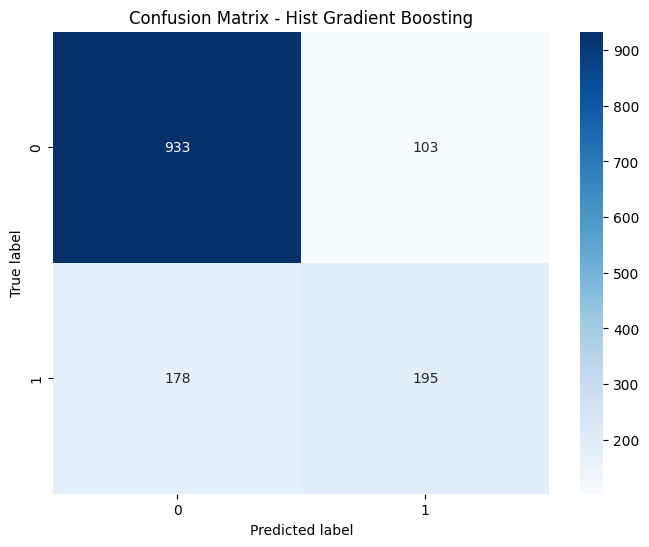

Model: Nearest Centroid
              precision    recall  f1-score   support

           0       0.83      0.44      0.57      1036
           1       0.33      0.75      0.45       373

    accuracy                           0.52      1409
   macro avg       0.58      0.60      0.51      1409
weighted avg       0.70      0.52      0.54      1409



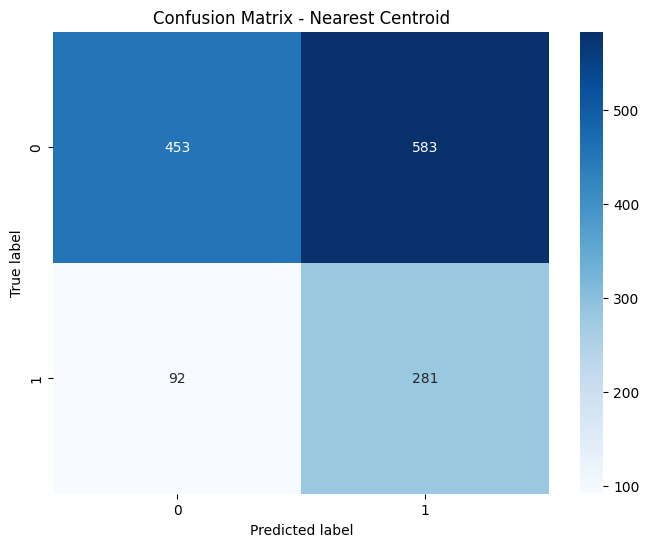

Model: Neural Network (MLP)
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



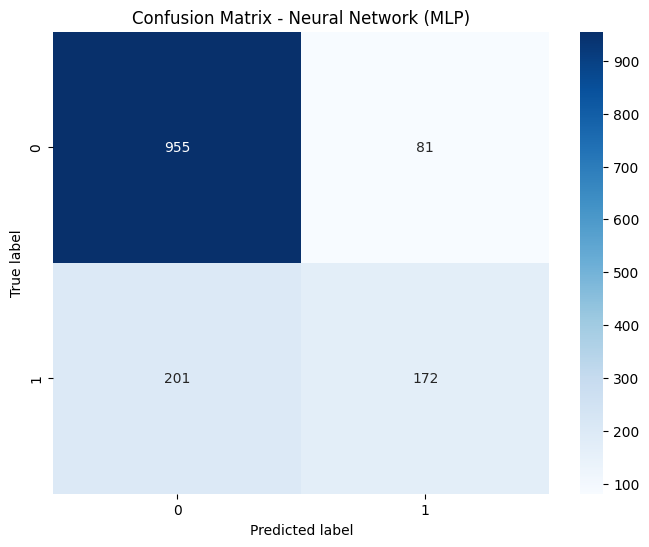

Model: Stochastic Gradient Descent
              precision    recall  f1-score   support

           0       0.92      0.61      0.74      1036
           1       0.44      0.85      0.58       373

    accuracy                           0.68      1409
   macro avg       0.68      0.73      0.66      1409
weighted avg       0.79      0.68      0.70      1409



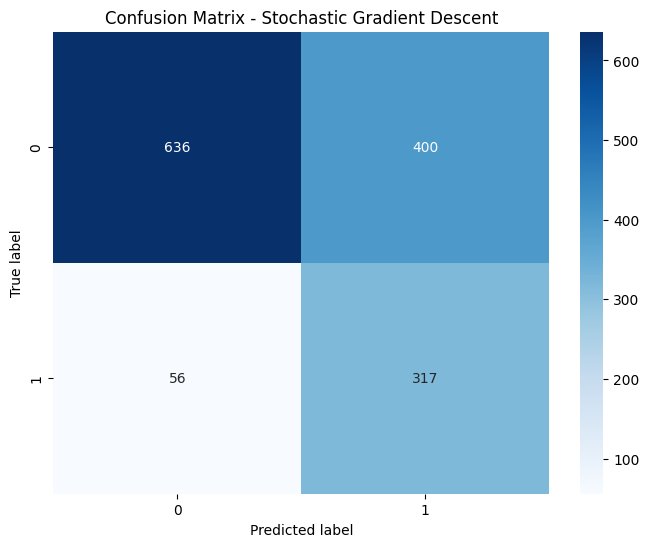

In [46]:
X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Logistic Regression (ElasticNet)": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "CART": DecisionTreeClassifier(random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Complement)": ComplementNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "Nearest Centroid": NearestCentroid(),
    "Neural Network (MLP)": MLPClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
}

for name, model in classifiers.items():
    try:
        clf = model.fit(X_train, y_train)
        
        # Tahminler yap
        y_pred = clf.predict(X_test)
        
        # Performansı değerlendir
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
    except Exception as e:
        print(f"Model: {name} - Hata: {e}")
    


In [47]:
df.to_csv('out.csv')  